# **Project 3**, APS1070 Winter 2022
#### **PCA [14 marks]**
**Deadline: March 11th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Ningcan Sun
*   **Student number**: 1003270435



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [2 Marks]

In [1]:
import pandas as pd
import math
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**

In [2]:
# Part 1, Q1

from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

def timeseries_plot(df, Country_list):
    fig, axs = plt.subplots(3,figsize=(15,15))
    for i in range(len(Country_list)):
        axs[i].plot(df.iloc[Country_list[i],:])
        # Total length is 733, I divide into 7, so it can shows 7 date
        axs[i].set_xticks([1,122,244,366,488,610,732]) 
        axs[i].get_yaxis().get_major_formatter().set_scientific(False)
        axs[i].title.set_text(df.index[Country_list[i]])
        axs[i].set_ylabel("Number of Confirm Case")
        axs[i].set_xlabel("Time")

In [3]:
# Part 1, Q2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = cases_raw.values
#transform
cases_raw_scaled_value = scaler.fit_transform(cases_raw)
cases_raw_scaled=pd.DataFrame(cases_raw_scaled_value,columns = cases_raw.columns, index = cases_raw.index)
cases_raw_scaled

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.254553,-0.254982,-0.255055,-0.255169,-0.254794,-0.255016,-0.255453,-0.255624,-0.256252,-0.256926
Albania,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.242599,-0.242745,-0.242623,-0.242692,-0.242044,-0.242016,-0.242233,-0.242166,-0.242527,-0.243002
Algeria,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.243246,-0.243669,-0.243729,-0.243844,-0.243513,-0.243674,-0.244009,-0.244051,-0.244403,-0.244797
Andorra,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.276497,-0.276791,-0.276722,-0.276669,-0.276027,-0.275992,-0.275892,-0.275730,-0.276244,-0.276866
Angola,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.265689,-0.266015,-0.265991,-0.265983,-0.265436,-0.265455,-0.265758,-0.265772,-0.266309,-0.266857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,-0.072791,-0.029292,-0.042737,-0.053076,-0.059572,-0.063104,-0.067417,-0.067945,-0.068994,-0.069665,...,0.057832,0.058149,0.058581,0.055760,0.058247,0.056585,0.055790,0.054531,0.054536,0.055156
West Bank and Gaza,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.200764,-0.201547,-0.201990,-0.202228,-0.202459,-0.203216,-0.203988,-0.204589,-0.205525,-0.206386
Yemen,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.279847,-0.280119,-0.280025,-0.279927,-0.279231,-0.279148,-0.279380,-0.279297,-0.279790,-0.280400
Zambia,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.231534,-0.231893,-0.231944,-0.232160,-0.231921,-0.232267,-0.232832,-0.233200,-0.233869,-0.234567


In [4]:
# Part 1, Q3
US_list=cases_raw_scaled.index.get_loc('US')
Can_list = cases_raw_scaled.index.get_loc('Canada')
China_list = cases_raw_scaled.index.get_loc('China')
country_list=US_list,Can_list,China_list
country_list=list(country_list)

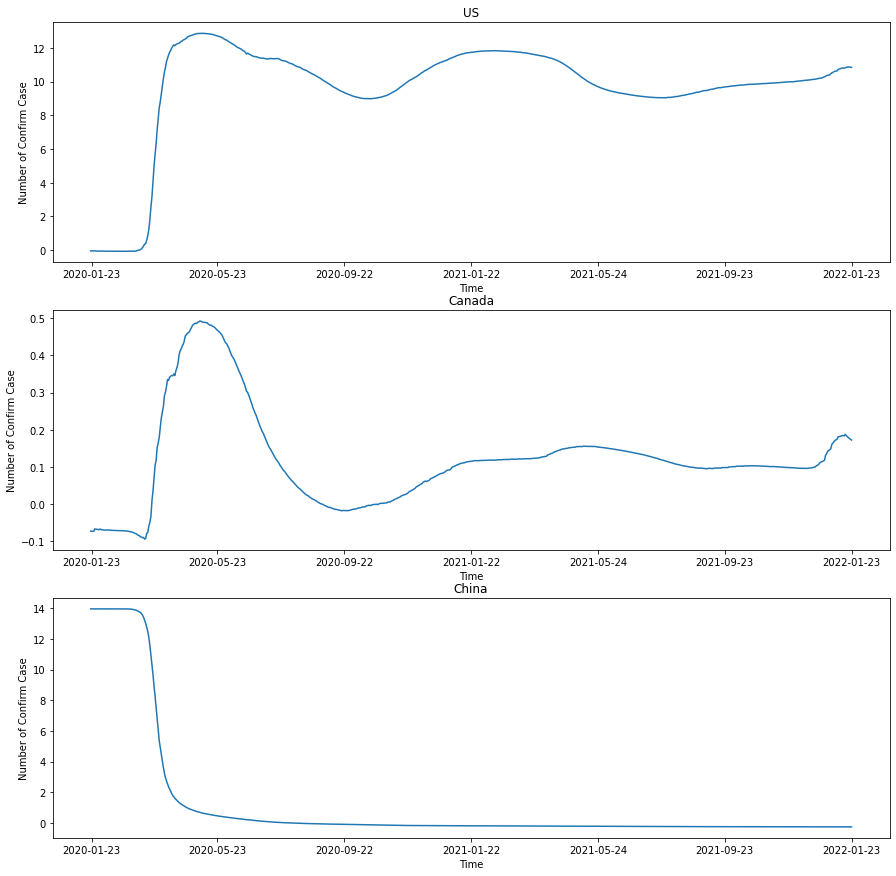

In [5]:
timeseries_plot(cases_raw_scaled,country_list)

##### Part 1, Q4 : Discuss the trends in the standardized time-series for the US, Canada, and China. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate?

As the graph shows that, the **<u>US</u>** start having covid 19 from 2020 Febrary, it reach to the peak point on 2020 May, and then although there are sone fluctions but it still really high, which means the confirm cases is still really high is US.

As the graph shows that, the **<u>Canada</u>** start having covid 19 from 2020 Febrary, it reach to the peak point on 2020 May, and then it start to decrease.

As the graph shows that, the **<u>China</u>** start having covid 19 very early on 2020 January, it is the highest point for China, and then it falls dramatically, and it shows that there is a very stable lower confirm case in China.

The curve goes up means there are more confirm cases, the curve goes down means there are less confirm cases.

The sign of the values means, if the sign is positive, which means it has a higher average confirmed cases compare to other countries. If the sign is negative, which means it lower than the average level of cases in other countries.


# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.25]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [6]:
# Part 2, Q1
cov_array=np.cov(cases_raw_scaled.T)
cov_array

array([[ 1.00512821,  1.00512126,  1.00511414, ..., -0.01743542,
        -0.01747945, -0.0175254 ],
       [ 1.00512126,  1.00512821,  1.00512134, ..., -0.0176613 ,
        -0.01770506, -0.01775095],
       [ 1.00511414,  1.00512134,  1.00512821, ..., -0.01690253,
        -0.01694052, -0.01698123],
       ...,
       [-0.01743542, -0.0176613 , -0.01690253, ...,  1.00512821,
         1.00511854,  1.00510009],
       [-0.01747945, -0.01770506, -0.01694052, ...,  1.00511854,
         1.00512821,  1.00512153],
       [-0.0175254 , -0.01775095, -0.01698123, ...,  1.00510009,
         1.00512153,  1.00512821]])

In [7]:
cov_array.shape

(733, 733)

In [8]:
# Part 2, Q2
from numpy import linalg
def get_sorted_eigen(df_cov):
    eigenvalue,eigenvector =linalg.eigh(df_cov)
    # sort it
    args = (-eigenvalue).argsort()
    eigenValues = eigenvalue[args]
    eigenVectors = eigenvector[:, args]
    return eigenValues, eigenVectors

In [9]:
eigenValues, eigenVectors =  get_sorted_eigen(cov_array)
eigenVectors

array([[ 7.59424602e-05,  1.21711020e-01, -4.06068889e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.57839673e-05,  1.21707808e-01, -4.06261870e-02, ...,
         5.72668028e-04,  3.92057279e-02,  2.17175688e-02],
       [ 9.16226464e-05,  1.21724974e-01, -4.05405387e-02, ...,
        -9.21263398e-03,  1.44083186e-03, -3.30851989e-02],
       ...,
       [ 3.95020907e-02, -6.24161862e-04,  8.10875226e-03, ...,
         1.89410019e-02,  3.63766232e-02, -2.54134800e-02],
       [ 3.94917946e-02, -6.36088813e-04,  7.87831025e-03, ...,
         4.02686339e-03, -5.64942204e-03,  1.25714387e-02],
       [ 3.94823319e-02, -6.00418673e-04,  8.05737147e-03, ...,
         4.58004228e-03,  1.01079922e-02, -1.29316320e-02]])

In [10]:
# use the eigenvalue to get the explained variance
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 85.47590445,  94.10558679,  98.08990311,  99.30079148,
        99.65862424,  99.8113032 ,  99.8744641 ,  99.91875382,
        99.94442571,  99.9666193 ,  99.97667849,  99.98351037,
        99.98804715,  99.9917002 ,  99.99399051,  99.99535537,
        99.9964488 ,  99.99718047,  99.99781163,  99.99825964,
        99.99865153,  99.99893343,  99.99917858,  99.99935209,
        99.99946151,  99.99954626,  99.99962391,  99.99968637,
        99.99973659,  99.99977844,  99.99981033,  99.9998396 ,
        99.99986021,  99.99987813,  99.99989412,  99.99990831,
        99.9999198 ,  99.99992963,  99.99993756,  99.99994412,
        99.99995051,  99.99995659,  99.99996145,  99.9999658 ,
        99.99996971,  99.99997289,  99.99997559,  99.9999778 ,
        99.99997996,  99.99998209,  99.99998389,  99.99998555,
        99.99998703,  99.99998821,  99.99998936,  99.99999034,
        99.99999128,  99.99999211,  99.99999275,  99.99999333,
        99.99999386,  99.99999435,  99.9999948 ,  99.99

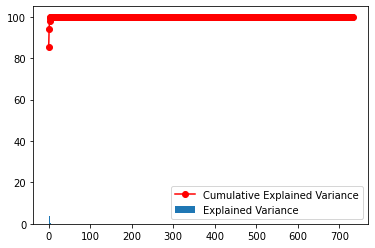

In [11]:
# Part 2, Q3
plt.bar(range(733), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

#### Part 2, Q4
only 3 eigenVectors are enough to explain more than 98% of variance,

In [12]:
# Part 2, Q5
pd.DataFrame(eigenVectors)

,0,1,2,3,4,5,6,7,8,9,...,723,724,725,726,727,728,729,730,731,732
0,0.000076,0.121711,-0.040607,-0.028355,-0.049629,0.019384,0.013076,-0.010653,0.021670,-0.049535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000066,0.121708,-0.040626,-0.028365,-0.049630,0.019285,0.013395,-0.010574,0.021268,-0.050145,...,-0.021062,0.018082,-0.003314,-0.014347,-0.011630,0.016322,-0.017082,0.000573,0.039206,0.021718
2,0.000092,0.121725,-0.040541,-0.028242,-0.049677,0.019611,0.012668,-0.008666,0.021267,-0.051068,...,-0.045913,-0.021590,0.007149,-0.001321,0.045837,0.004649,0.022316,-0.009213,0.001441,-0.033085
3,0.000070,0.121715,-0.040616,-0.028175,-0.049673,0.019266,0.012582,-0.009030,0.021561,-0.052328,...,0.001409,0.090009,0.050661,0.045785,0.078042,-0.000279,-0.107847,-0.072259,-0.161245,0.220657
4,0.000098,0.121723,-0.040529,-0.028294,-0.049724,0.019727,0.012701,-0.009192,0.021990,-0.051213,...,0.089639,-0.071129,-0.027952,-0.121230,-0.149623,-0.015553,0.169413,0.065664,0.153733,-0.265601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,0.039522,-0.000738,0.007573,0.036815,-0.039514,-0.022127,0.005850,0.007822,-0.059137,-0.054414,...,-0.007158,0.041217,0.015863,0.009925,0.009729,-0.008230,-0.023703,-0.017065,-0.047127,0.033527
729,0.039511,-0.000689,0.007741,0.037447,-0.038951,-0.021161,0.004699,0.010079,-0.058787,-0.058101,...,0.026898,-0.013633,0.011793,0.016623,0.039707,-0.032971,-0.038840,-0.033707,0.004454,-0.014913
730,0.039502,-0.000624,0.008109,0.037745,-0.038739,-0.019637,0.003521,0.011923,-0.058830,-0.060056,...,0.005969,0.008664,0.012085,-0.016121,-0.082599,-0.022272,0.019078,0.018941,0.036377,-0.025413
731,0.039492,-0.000636,0.007878,0.038343,-0.038265,-0.020006,0.001759,0.014961,-0.058743,-0.062685,...,-0.010964,-0.017171,0.011270,0.028894,0.012112,0.006177,0.011648,0.004027,-0.005649,0.012571


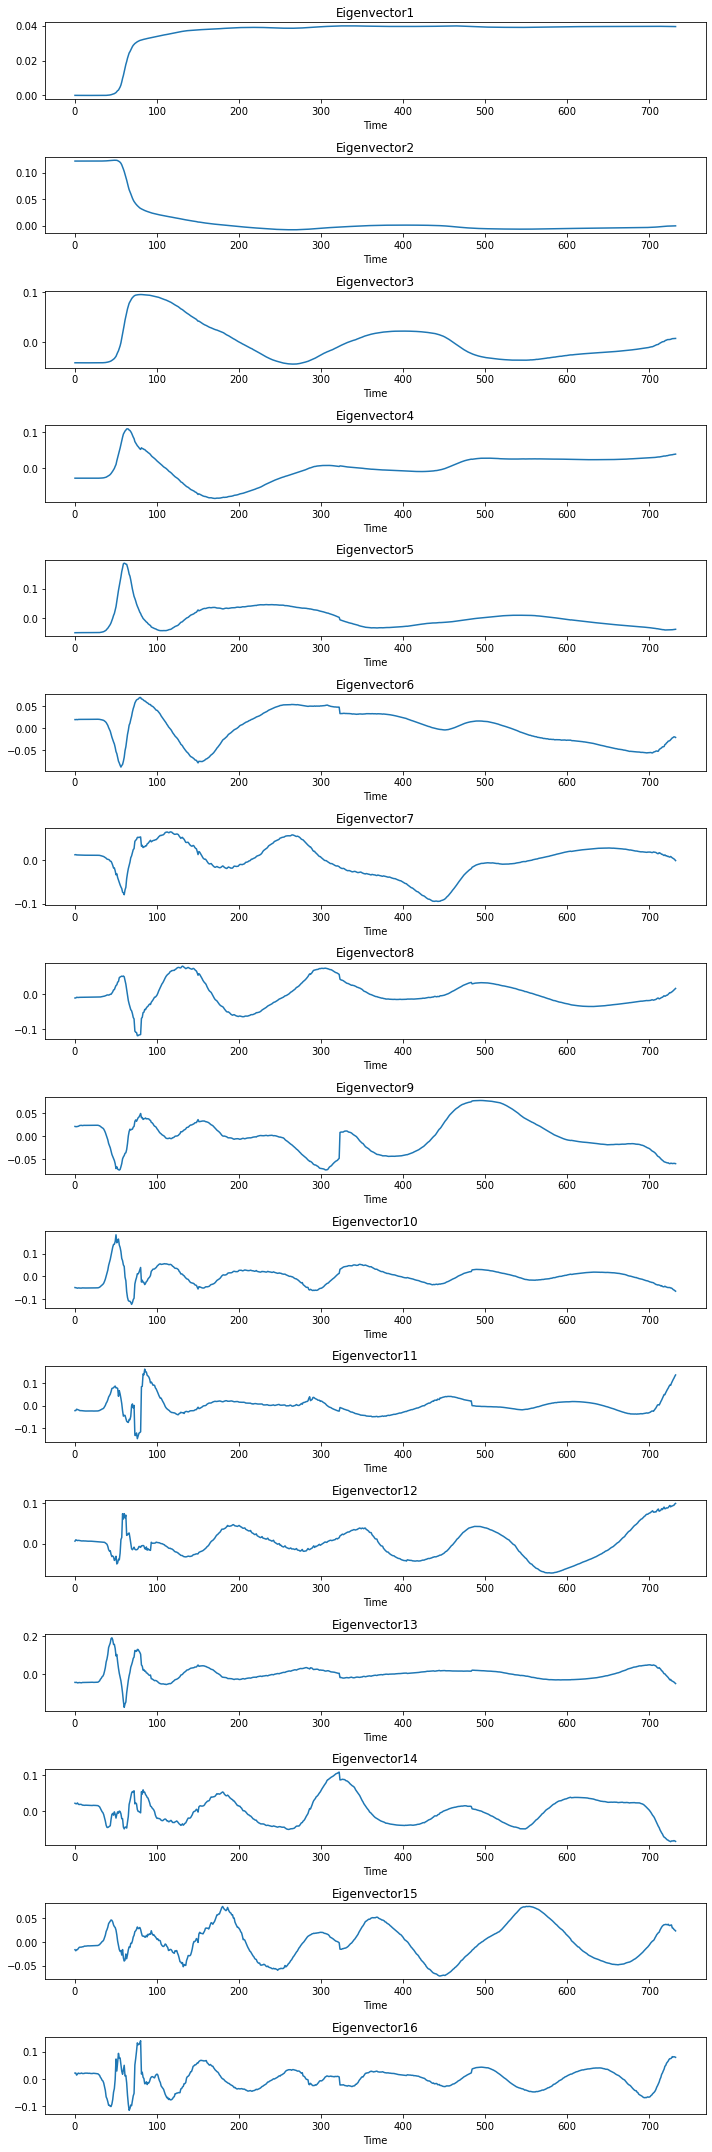

In [13]:
fig, axs = plt.subplots(16,figsize=(10,30))
for i in range(16):
    axs[i].plot(eigenVectors[:,i])
    axs[i].set_xlabel("Time")
    # Total length is 733, I divide into 7, so it can shows 7 date
    axs[i].title.set_text('Eigenvector'+str(i+1))
    fig.tight_layout()
        

##### Part 2, Q6 Question: Compare the first few PCs with the rest of them. Do you see any difference in their trend?

I noticed that for the first few PCs, they are relatively smooth and almost no fluctuation, less variance. But when I saw the high numbers of PCs, it is very fluatuate and have very high variance. So I also can conclude that as the variance increase, the model can explain more variance.

# Part 3: Data reconstruction [4 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


In [14]:
# part 3
from sklearn.metrics import mean_squared_error

def plot_country_figures(original_df, country_name):
    scaler = StandardScaler()
    scaler_re= StandardScaler().fit_transform(cases_raw.values)
    df_scaler = pd.DataFrame(scaler, index=cases_raw.index,columns=cases_raw.columns)
    ### first graph
    fig, axs = plt.subplots(4,figsize=(15,15))
    index_country = original_df.index.get_loc(country_name)
    axs[0].plot(original_df.iloc[index_country,:])
    axs[0].get_yaxis().get_major_formatter().set_scientific(False)
    axs[0].title.set_text(original_df.index[index_country])
    axs[0].set_xticks([1,122,244,366,488,610,732])
    ### Second graph
    PC1 = eigenVectors[:,0:1]
    PC1_2 = eigenVectors[:,0:2]
    PC1_4 = eigenVectors[:,0:4]
    PC1_8 = eigenVectors[:,0:8]
    PC1_16 = eigenVectors[:,0:16]
    # get the projection
    proj1  = np.dot(scaler_re, PC1)
    proj1_2 = np.dot(scaler_re, PC1_2)
    proj1_4 = np.dot(scaler_re, PC1_4)
    proj1_8 = np.dot(scaler_re, PC1_8)
    proj1_16 = np.dot(scaler_re, PC1_16)
    #reconstruction
    Recon1 = np.dot(proj1, PC1.T)
    Recon1_2 = np.dot(proj1_2, PC1_2.T)
    Recon1_4 = np.dot(proj1_4, PC1_4.T)
    Recon1_8 = np.dot(proj1_8, PC1_8.T)
    Recon1_16 = np.dot(proj1_16,PC1_16.T)
    
    scaler.fit(cases_raw.values)
    inverse1 = pd.DataFrame(scaler.inverse_transform(Recon1), columns=cases_raw.columns, index=cases_raw.index)
    inverse1_2 = pd.DataFrame(scaler.inverse_transform(Recon1_2), columns=cases_raw.columns, index=cases_raw.index)
    inverse1_4 = pd.DataFrame(scaler.inverse_transform(Recon1_4), columns=cases_raw.columns, index=cases_raw.index)
    inverse1_8 = pd.DataFrame(scaler.inverse_transform(Recon1_8), columns=cases_raw.columns, index=cases_raw.index)
    inverse1_16 = pd.DataFrame(scaler.inverse_transform(Recon1_16), columns=cases_raw.columns, index=cases_raw.index)
    
    PC1_country = inverse1[inverse1.index ==country_name]
    PC12_country = inverse1_2[inverse1_2.index ==country_name]
    PC14_country = inverse1_4[inverse1_4.index ==country_name]
    PC18_country = inverse1_8[inverse1_8.index ==country_name]
    PC16_country = inverse1_16[inverse1_16.index ==country_name]

    axs[1].plot(PC1_country.T)
    axs[1].plot(PC12_country.T)
    axs[1].plot(PC14_country.T)
    axs[1].plot(PC18_country.T)
    axs[1].plot(PC16_country.T)
    axs[1].get_yaxis().get_major_formatter().set_scientific(False)
    axs[1].title.set_text(original_df.index[index_country])
    axs[1].legend(['Reconstruction with only PC1','Reconstruction with only PC1&2','Reconstruction with only PC1 to PC4','Reconstruction with PC1 to PC8','Reconstruction with PC1 to PC16'])
    axs[1].set_xticks([1,122,244,366,488,610,732])
    
    ### third graph
    # best reconstruction is PC 1 to 16, because more PC, can explain more variance. 
    PC1_16 = eigenVectors[:,0:16]
    proj1_16 = np.dot(scaler_re, PC1_16)
    Recon1_16 = np.dot(proj1_16,PC1_16.T)
    scaler.fit(cases_raw.values)
    inverse1_16 = pd.DataFrame(scaler.inverse_transform(Recon1_16), columns=cases_raw.columns, index=cases_raw.index)
    PC16_country = inverse1_16[inverse1_16.index ==country_name]
    gagga=pd.DataFrame(cases_raw.loc[country_name])
    residual_error=gagga.T-PC16_country
    
    #residual_error = pd.DataFrame(original_df.loc[country_name].T) - PC16_country
    axs[2].plot(residual_error.T)
    axs[2].legend(['Residual error for PC 1 to 16'])
    axs[2].set_xticks([1,122,244,366,488,610,732])
    axs[2].title.set_text(original_df.index[index_country])
    
    ####forth graph
    RMSE_total = []
    for x in range(1,101):
        PC = eigenVectors[:,0:x]
        proj = np.dot(scaler_re, PC)
        Recon = np.dot(proj,PC.T)
        scaler.fit(cases_raw.values)
        inverse = pd.DataFrame(scaler.inverse_transform(Recon), columns=cases_raw.columns, index=cases_raw.index)
        y_predicted = inverse[inverse.index ==country_name]
        y_actual=pd.DataFrame(cases_raw.loc[country_name]).T
        RMSE= mean_squared_error(y_actual, y_predicted, squared=False)
        RMSE_total.append(RMSE)
    axs[3].plot(RMSE_total)
    axs[3].title.set_text(original_df.index[index_country])
    
    
    

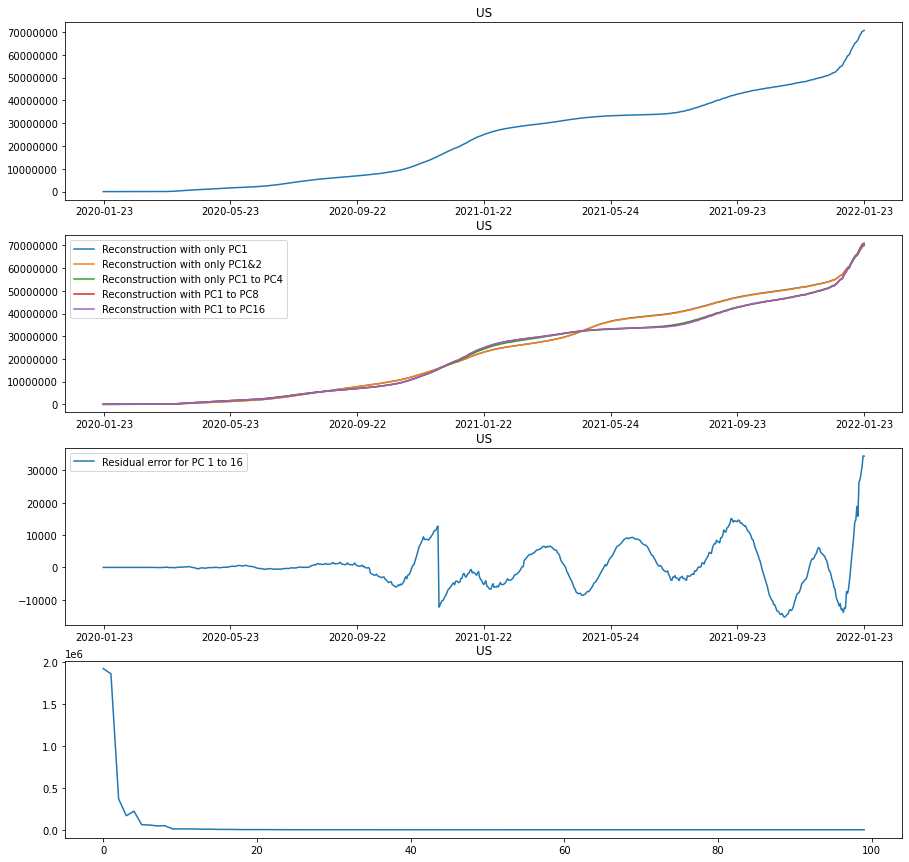

In [15]:
plot_country_figures(cases_raw, 'US')

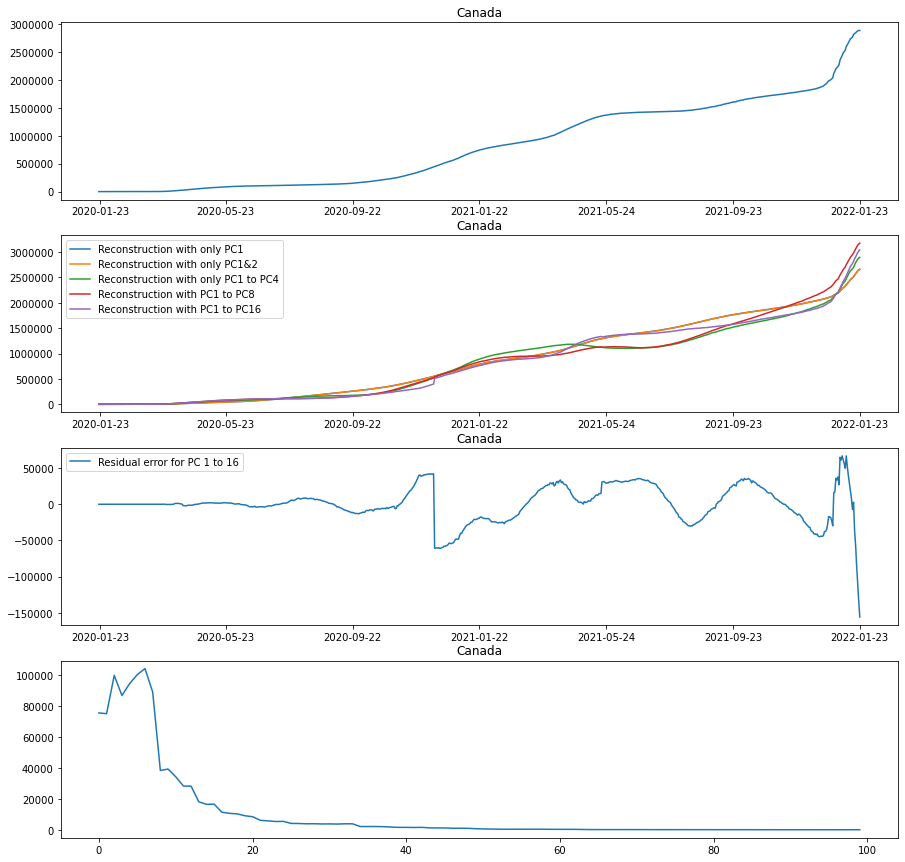

In [16]:
plot_country_figures(cases_raw, 'Canada')

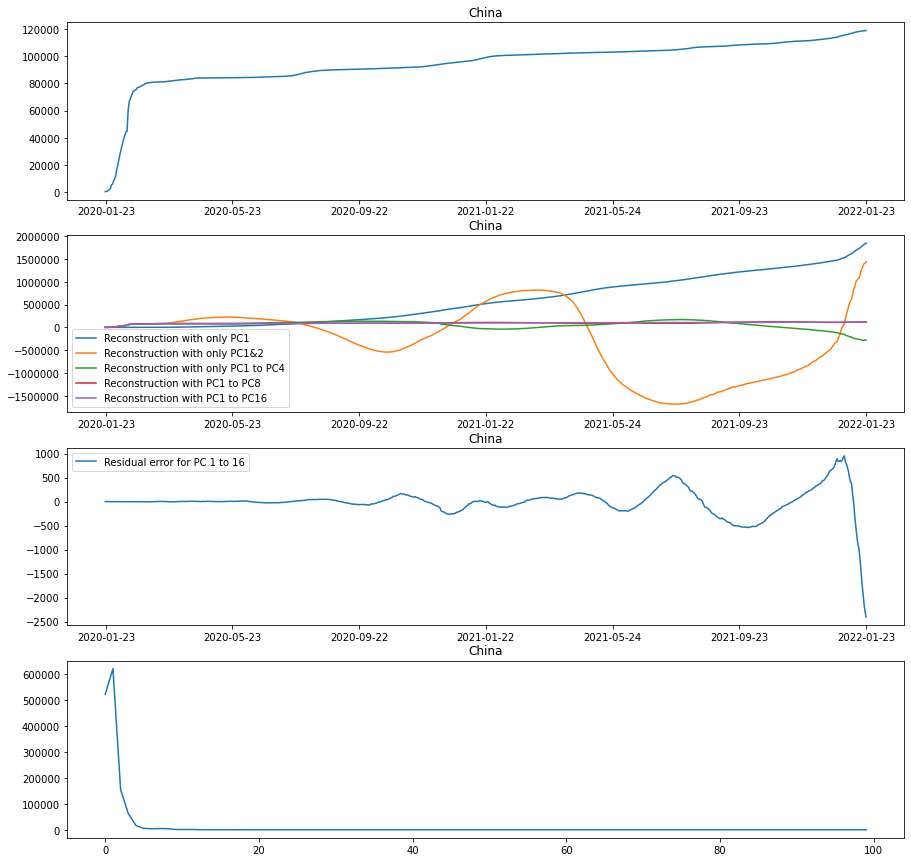

In [17]:
plot_country_figures(cases_raw, 'China')

# Part 4: SVD [3 Marks]
Modify your function in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.**[1]**


Repeat part 3 and compare your PCA and SVD results. **[1]**



In [18]:
# Modify your function in part 3 to use SVD instead of PCA for extracting the eigenvectors.

from sklearn.metrics import mean_squared_error

def plot_country_figures_SVD(original_df, country_name):
    scaler = StandardScaler()
    scaler_re= StandardScaler().fit_transform(cases_raw.values)
    df_scaler = pd.DataFrame(scaler, index=cases_raw.index,columns=cases_raw.columns)
    ### first graph
    fig, axs = plt.subplots(4,figsize=(15,15))
    index_country = original_df.index.get_loc(country_name)
    axs[0].plot(original_df.iloc[index_country,:])
    axs[0].get_yaxis().get_major_formatter().set_scientific(False)
    axs[0].title.set_text(original_df.index[index_country])
    axs[0].set_xticks([1,122,244,366,488,610,732])
    ### Second graph
    u,s,vh = np.linalg.svd(cases_raw_scaled, full_matrices=True)
    PC1 = u[:,0:1]
    PC1_2 = u[:,0:2]
    PC1_4 = u[:,0:4]
    PC1_8 = u[:,0:8]
    PC1_16 = u[:,0:16]
    # get the projection
    proj1  = np.dot(scaler_re.T, PC1)
    proj1_2 = np.dot(scaler_re.T, PC1_2)
    proj1_4 = np.dot(scaler_re.T, PC1_4)
    proj1_8 = np.dot(scaler_re.T, PC1_8)
    proj1_16 = np.dot(scaler_re.T, PC1_16)
    #reconstruction
    Recon1 = np.dot(proj1, PC1.T)
    Recon1_2 = np.dot(proj1_2, PC1_2.T)
    Recon1_4 = np.dot(proj1_4, PC1_4.T)
    Recon1_8 = np.dot(proj1_8, PC1_8.T)
    Recon1_16 = np.dot(proj1_16,PC1_16.T)
    
    scaler.fit(cases_raw.values)
    inverse1 = pd.DataFrame(scaler.inverse_transform(Recon1.T), columns=cases_raw.columns, index=cases_raw.index)
    inverse1_2 = pd.DataFrame(scaler.inverse_transform(Recon1_2.T), columns=cases_raw.columns, index=cases_raw.index)
    inverse1_4 = pd.DataFrame(scaler.inverse_transform(Recon1_4.T), columns=cases_raw.columns, index=cases_raw.index)
    inverse1_8 = pd.DataFrame(scaler.inverse_transform(Recon1_8.T), columns=cases_raw.columns, index=cases_raw.index)
    inverse1_16 = pd.DataFrame(scaler.inverse_transform(Recon1_16.T), columns=cases_raw.columns, index=cases_raw.index)
    
    PC1_country = inverse1[inverse1.index ==country_name]
    PC12_country = inverse1_2[inverse1_2.index ==country_name]
    PC14_country = inverse1_4[inverse1_4.index ==country_name]
    PC18_country = inverse1_8[inverse1_8.index ==country_name]
    PC16_country = inverse1_16[inverse1_16.index ==country_name]

    axs[1].plot(PC1_country.T)
    axs[1].plot(PC12_country.T)
    axs[1].plot(PC14_country.T)
    axs[1].plot(PC18_country.T)
    axs[1].plot(PC16_country.T)
    axs[1].get_yaxis().get_major_formatter().set_scientific(False)
    axs[1].title.set_text(original_df.index[index_country])
    axs[1].legend(['Reconstruction with 1SVD','Reconstruction with only 1&2 SVD','Reconstruction with only 1 to 4 SVD','Reconstruction with 1 to 8 SVD','Reconstruction with 1 to 16 SVD'])
    axs[1].set_xticks([1,122,244,366,488,610,732])
    
    ### third graph
    # best reconstruction is PC 1 to 16, because more PC, can explain more variance. 
    PC1_16 = u[:,0:16]
    proj1_16 = np.dot(scaler_re.T, PC1_16)
    Recon1_16 = np.dot(proj1_16,PC1_16.T)
    scaler.fit(cases_raw.values)
    inverse1_16 = pd.DataFrame(scaler.inverse_transform(Recon1_16.T), columns=cases_raw.columns, index=cases_raw.index)
    PC16_country = inverse1_16[inverse1_16.index ==country_name]
    gagga=pd.DataFrame(cases_raw.loc[country_name])
    residual_error=gagga.T-PC16_country
    
    #residual_error = pd.DataFrame(original_df.loc[country_name].T) - PC16_country
    axs[2].plot(residual_error.T)
    axs[2].legend(['Residual error for PC 1 to 16'])
    axs[2].set_xticks([1,122,244,366,488,610,732])
    axs[2].title.set_text(original_df.index[index_country])
    
    ####forth graph
    RMSE_total = []
    for x in range(1,101):
        PC = u[:,0:x]
        proj = np.dot(scaler_re.T, PC)
        Recon = np.dot(proj,PC.T)
        scaler.fit(cases_raw.values)
        inverse = pd.DataFrame(scaler.inverse_transform(Recon.T), columns=cases_raw.columns, index=cases_raw.index)
        y_predicted = inverse[inverse.index ==country_name]
        y_actual=pd.DataFrame(cases_raw.loc[country_name]).T
        RMSE= mean_squared_error(y_actual, y_predicted, squared=False)
        RMSE_total.append(RMSE)
    axs[3].plot(RMSE_total)
    axs[3].title.set_text(original_df.index[index_country])
    
    
    

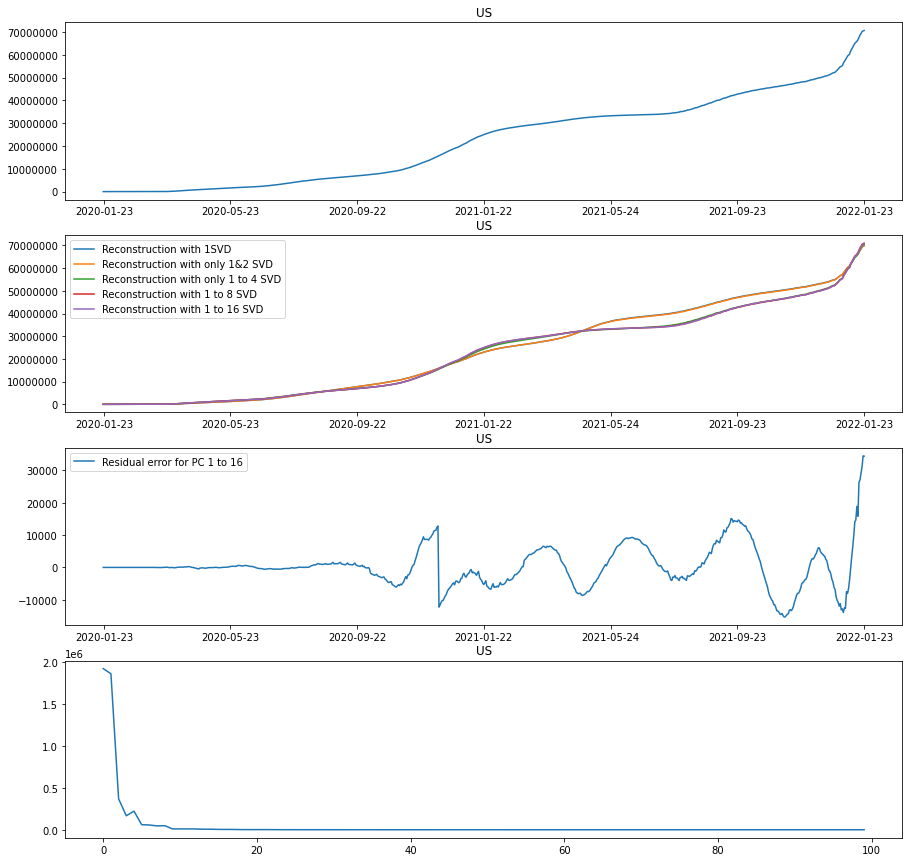

In [19]:
plot_country_figures_SVD(cases_raw, 'US')

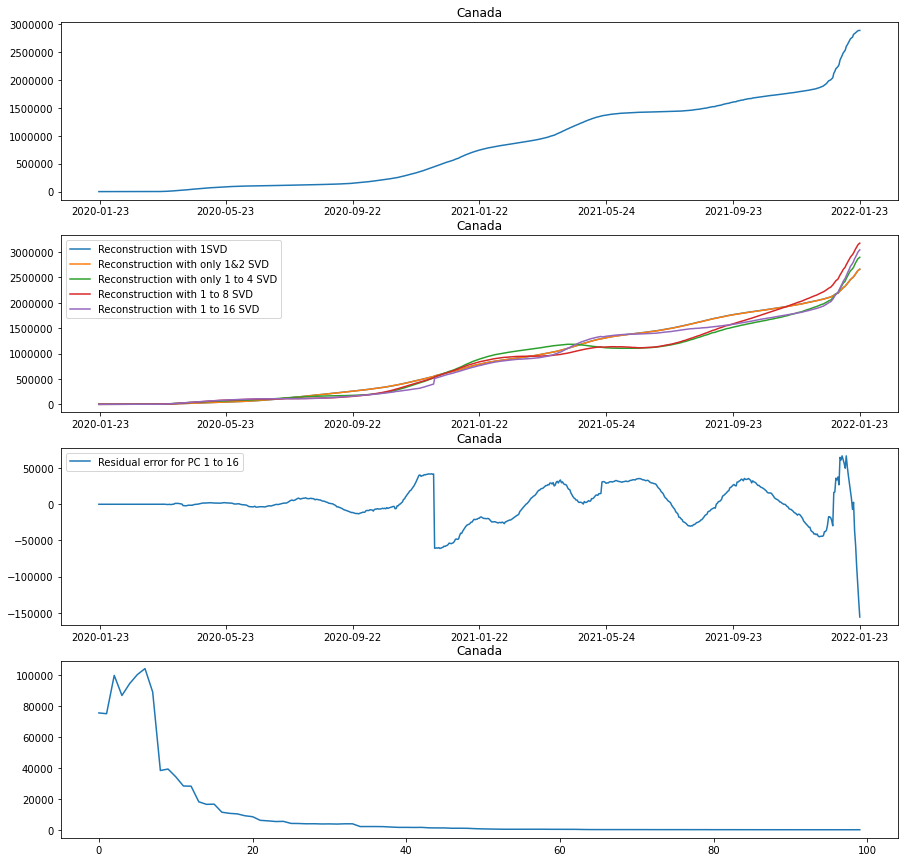

In [20]:
plot_country_figures_SVD(cases_raw, 'Canada')

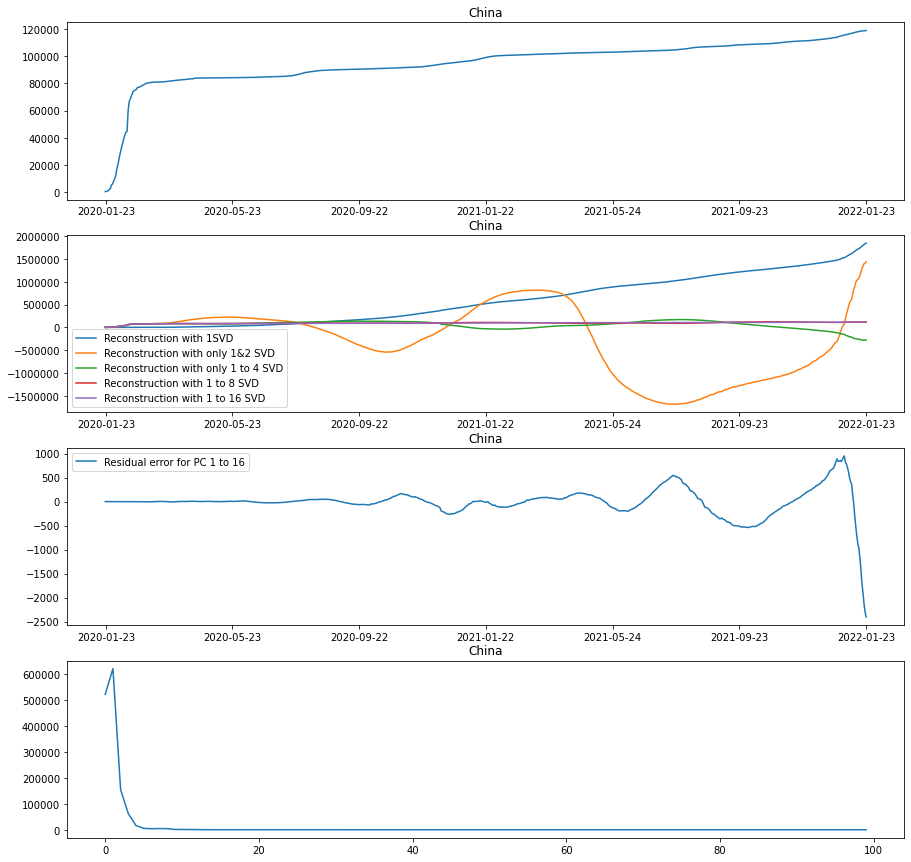

In [21]:
plot_country_figures_SVD(cases_raw, 'China')

##### Explain if standardization or covariance computation is required for this part.
I think it is not required for this part. The reason is for the SVD it not required for the square matrix, any size of matrix is fine. So we do not need to calculate the standardization or the covariance computation.

##### Repeat part 3 and compare your PCA and SVD results. 
Compare with the PCA and SVD, I noticed that they are alomost get the similar plots for the PCA and SVD, so they are used for decrease the deminsions.

# Part 5: Fashion-MNIST dataset [3 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.25]**
* Compute Eigenvectors and Eigenvalues using SVD. **[0.25]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[0.5]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [22]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [23]:
x.shape

(1000, 784)

In [24]:
type(x)

pandas.core.frame.DataFrame

In [25]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,178.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,...,26.0,13.0,2.0,24.0,31.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Label is: Ankle boot


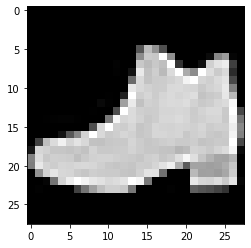

In [26]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

In [27]:
x.loc[15].shape

(784,)

##### Create a new dataset by selecting images from only three categories (three distinct labels)

In [28]:
# 5.1 Create a new dataset
# select the y only in class 0,2,4
y=pd.DataFrame(y)
new_y=y.loc[y['class'].isin(['0', '2', '4'])]
new_y.head()

,class
1,0
2,0
4,0
5,2
7,2


In [29]:
# 5.1 Create a new dataset
# select the x, where y only in class 0,2,4
a=list(new_y.index)
x= pd.DataFrame(x)
new_x=x.iloc[a]
new_x=new_x.reset_index()
new_y=new_y.reset_index()
new_x=new_x.drop('index', axis=1)
new_y=new_y.drop('index', axis=1)

In [30]:
scaler = StandardScaler()
new_x_scaled= StandardScaler().fit_transform(new_x.values)

##### To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? 
The reason is if you select the similar shape, then the eigenvectors (pixels) you will use less to express the three classes. However, if you choose the different shape of items, such as 'Coat' and 'bag', then you need to choose more eigenvectors to express these classes.

In [31]:
a,b,c = np.linalg.svd(new_x_scaled.T)

In [32]:
a.shape

(784, 784)

##### Compute Eigenvectors and Eigenvalues using SVD.

In [33]:
pd.DataFrame(new_x_scaled)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,-0.079305,-0.0725,-0.102164,-0.103671,0.206368,-0.135136,-0.236072,-0.369539,-0.534066,...,1.133828,1.265830,2.000518,0.780518,-0.725779,-0.678953,-0.428698,-0.210858,-0.096733,-0.060566
1,0.0,-0.079305,-0.0725,-0.102164,-0.103671,-0.104805,-0.135136,-0.236072,-0.369539,-0.044647,...,-0.767462,-0.688910,-0.545060,-0.621993,-0.725779,-0.678953,-0.428698,-0.210858,-0.096733,-0.060566
2,0.0,-0.079305,-0.0725,-0.102164,-0.103671,-0.104805,-0.135136,-0.236072,-0.369539,-0.534066,...,-0.767462,-0.688910,-0.564793,-0.621993,-0.725779,-0.678953,-0.428698,-0.210858,-0.096733,-0.060566
3,0.0,-0.079305,-0.0725,-0.102164,0.191946,-0.104805,-0.135136,-0.236072,-0.369539,-0.044647,...,-0.767462,-0.688910,-0.564793,-0.621993,1.190818,2.022479,1.364567,-0.210858,-0.096733,-0.060566
4,0.0,-0.079305,-0.0725,-0.102164,-0.103671,0.206368,-0.006690,-0.236072,-0.369539,-0.534066,...,-0.767462,-0.688910,-0.505594,-0.621993,0.455882,3.154816,5.245882,4.544063,-0.096733,-0.060566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.0,-0.079305,-0.0725,-0.102164,-0.103671,-0.104805,-0.006690,-0.236072,-0.369539,2.535924,...,2.443961,1.917410,-0.564793,-0.621993,-0.725779,-0.678953,-0.428698,-0.210858,-0.096733,-0.060566
284,0.0,-0.079305,-0.0725,-0.102164,-0.103671,-0.104805,-0.006690,-0.236072,-0.369539,-0.534066,...,-0.687575,-0.688910,-0.564793,1.850856,1.551081,0.744556,-0.428698,-0.210858,-0.096733,-0.060566
285,0.0,-0.079305,-0.0725,-0.102164,-0.103671,-0.104805,-0.006690,-0.236072,-0.369539,-0.534066,...,0.207149,0.442782,0.461331,-0.621993,-0.725779,-0.662777,-0.428698,-0.210858,-0.096733,-0.060566
286,0.0,-0.079305,-0.0725,-0.102164,-0.103671,0.517541,-0.135136,-0.236072,-0.340349,-0.000154,...,-0.751484,-0.688910,-0.110931,1.389504,0.614398,-0.630424,-0.428698,-0.210858,-0.096733,-0.060566


In [34]:
# 5.2 Compute Eigenvectors and Eigenvalues using SVD
n,m=new_x_scaled.shape
scaler = StandardScaler()
scaler_re = StandardScaler().fit_transform(new_x.values)
df_scaler = pd.DataFrame(scaler, index=new_x.index,columns=new_x.columns)
u,s,vh = np.linalg.svd(new_x_scaled.T)
eigenvalues = s**2
eigenvectors = u

In [35]:
eigenvectors.shape

(784, 784)

In [36]:
eigenvalues.shape

(288,)

In [37]:
pd.DataFrame(eigenvectors)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-8.270817e-17,-6.910575e-17,-7.135915e-17,-3.116641e-17,-5.509051e-17,8.889185e-19,-2.006947e-17,3.955930e-17,1.259299e-17,-7.842989e-18,...,-0.013699,0.045637,-0.088802,-0.097511,0.039786,0.054015,0.060688,0.005623,0.049990,0.022903
1,5.418666e-03,2.339462e-02,-5.525479e-02,-8.366360e-02,-5.330944e-02,-5.939377e-02,1.635616e-02,6.001913e-04,-2.431076e-02,1.426176e-03,...,0.019934,0.041876,0.002618,0.045776,-0.013708,-0.111603,-0.026514,-0.082518,0.003323,-0.016283
2,6.324954e-03,2.997579e-02,-5.912910e-02,-9.317437e-02,-5.276514e-02,-7.041482e-02,2.126209e-02,-1.765927e-03,-1.573645e-02,-1.170689e-03,...,0.071825,0.116472,-0.081548,-0.041500,0.023984,-0.061471,0.010158,-0.043486,-0.001514,-0.030697
3,8.650739e-03,2.952057e-02,-5.691876e-02,-8.503377e-02,-5.314139e-02,-6.931571e-02,1.925382e-02,-1.298632e-03,-1.202343e-02,-3.029092e-03,...,-0.070364,-0.030523,-0.070362,0.000784,-0.007124,0.085164,0.074562,-0.030547,-0.034289,-0.003177
4,8.701333e-03,3.030287e-02,-5.808184e-02,-8.412403e-02,-5.100927e-02,-6.757482e-02,1.950376e-02,-2.490592e-04,-1.485512e-02,-5.250821e-05,...,-0.004475,-0.028547,-0.017163,0.037318,0.021087,0.032565,0.058509,0.092012,0.014559,-0.009346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-2.245261e-02,4.951204e-02,2.957123e-02,2.131398e-02,-2.340484e-02,-2.001758e-02,3.995048e-02,-2.420623e-02,1.783234e-02,-1.205964e-02,...,-0.007611,0.005443,-0.043217,-0.010284,-0.180493,0.391475,-0.122270,-0.018720,-0.016979,0.004001
780,-1.741169e-02,4.312933e-02,-8.052303e-04,3.749583e-02,-9.672357e-03,-2.167961e-02,6.134755e-02,-5.431819e-02,-8.174990e-04,5.432208e-02,...,0.018177,0.000217,0.020878,0.012151,0.008832,-0.087036,0.393079,-0.102647,0.002218,-0.001931
781,-7.205816e-03,4.070716e-02,-4.075855e-02,-4.566288e-03,3.911407e-03,-2.662473e-02,3.972451e-02,-2.726639e-02,-1.705344e-02,8.296532e-02,...,-0.000005,0.014919,-0.007010,-0.031629,0.063304,-0.000605,-0.109834,0.375050,-0.043513,-0.001862
782,1.089152e-03,3.344491e-02,-5.200557e-02,-6.626899e-02,-2.259356e-02,-5.356410e-02,2.002309e-02,-7.342186e-03,-1.838687e-02,2.732315e-02,...,-0.009240,-0.015735,-0.002283,-0.012137,0.005168,-0.014585,0.021666,-0.020080,0.658340,-0.012018


In [38]:
eigenvectors.shape

(784, 784)

In [39]:
#new_y=new_y.drop('level_0',axis=1)

##### Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? 

Label is: 0


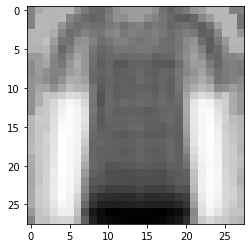

Label is: 0


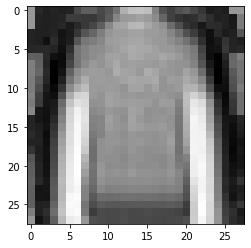

Label is: 2


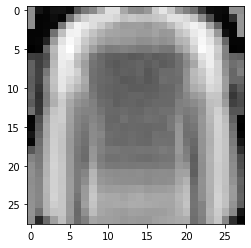

Label is: 2


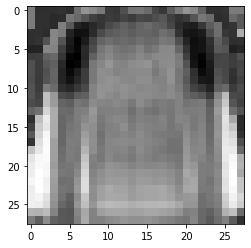

Label is: 0


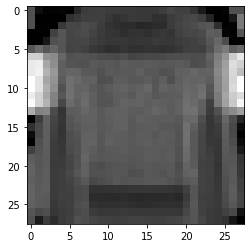

Label is: 0


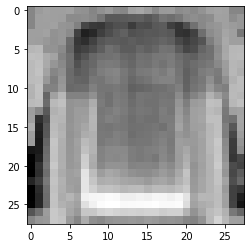

Label is: 4


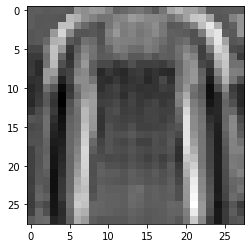

Label is: 4


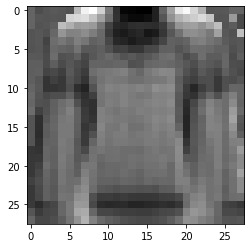

Label is: 4


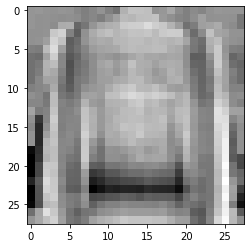

Label is: 0


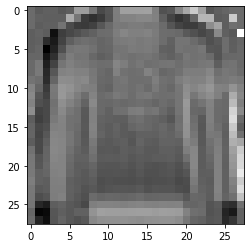

In [40]:
# 5.3Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? 
for i in range(1,11):
    eigenvectors_1to10 = eigenvectors[:,i]
    plt.gray() 
    plt.imshow(eigenvectors_1to10.reshape(28,28)) 
    print ("Label is:", new_y['class'][i])
    plt.show() 

##### Question: What trends do you observe
I observe that as the number of eigenvetors increase, the graph become more and more clear and easy classify.

##### Create a function that requires an argument  𝑛  and plots a random image from the dataset, as well as a reconstruction with the first  𝑛  th principal components.

In [41]:
def n_pc (x):
    scaler = StandardScaler()
    scaler_re= StandardScaler().fit_transform(new_x.values)
    df_scaler = pd.DataFrame(scaler, index=new_x.index,columns=new_x.columns)
    new_x_scaled = scaler.fit_transform(new_x)
    u,s,vh = np.linalg.svd(new_x_scaled, full_matrices=True)

    PC1_16 = u[:,0:x]
    proj1_16 = np.dot(scaler_re.T, PC1_16)
    Recon1_16 = np.dot(proj1_16,PC1_16.T)
    scaler.fit(new_x.values)
    inverse1_16 = pd.DataFrame(scaler.inverse_transform(Recon1_16.T), columns=new_x.columns, index=new_x.index)


    plt.gray() 
    plt.imshow(inverse1_16.sample().values.reshape(28,28)) 
    #print ("Label is:", new_y['class'][i])
    plt.show() 

##### Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. [0.5]

1 components


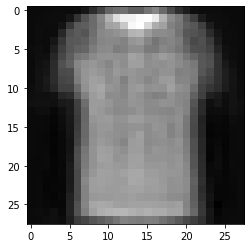

2 components


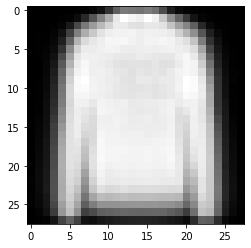

3 components


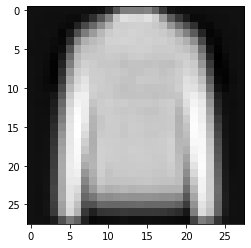

4 components


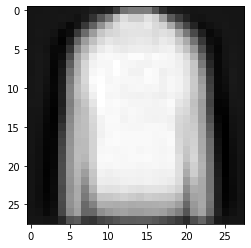

5 components


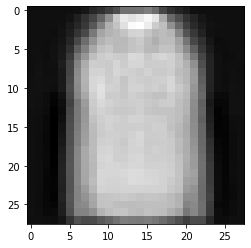

6 components


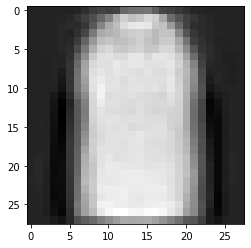

7 components


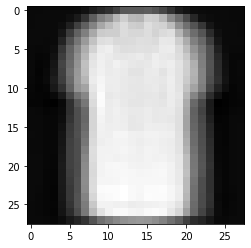

8 components


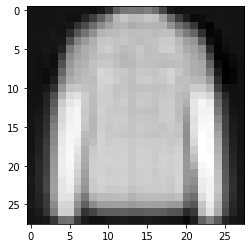

9 components


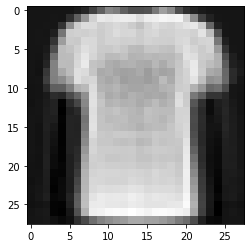

10 components


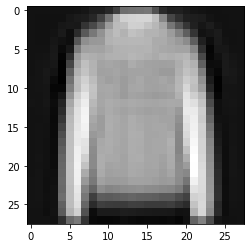

11 components


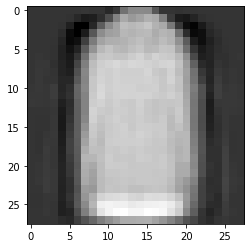

12 components


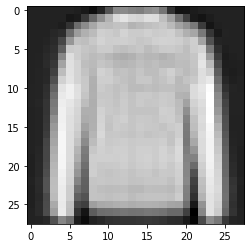

13 components


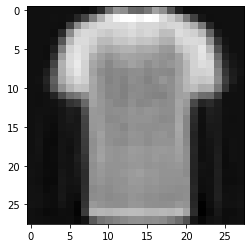

14 components


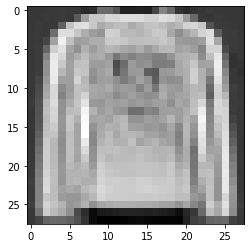

15 components


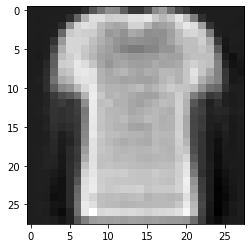

16 components


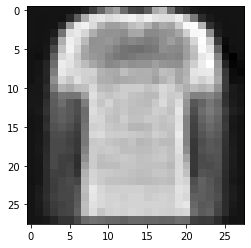

17 components


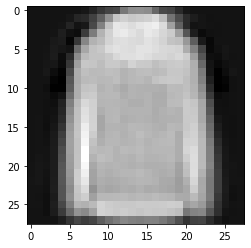

18 components


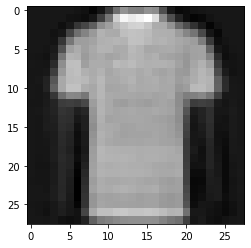

19 components


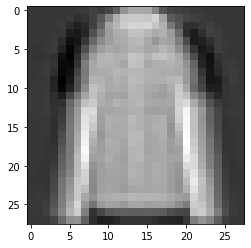

20 components


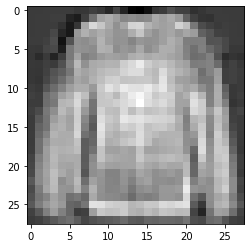

21 components


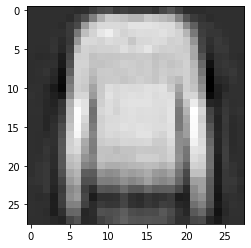

22 components


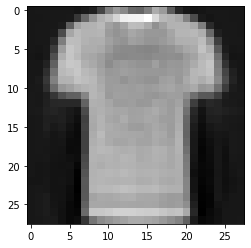

23 components


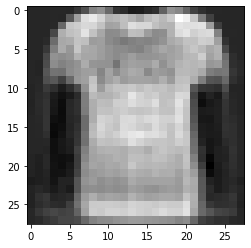

24 components


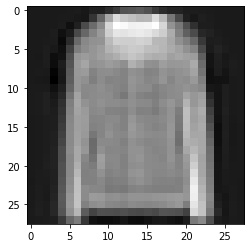

25 components


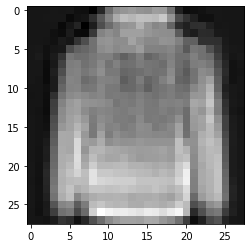

26 components


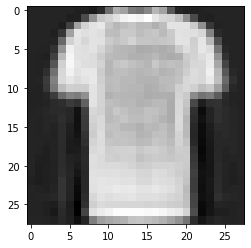

27 components


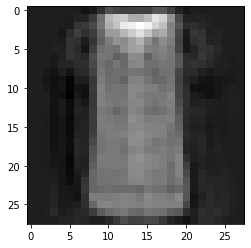

28 components


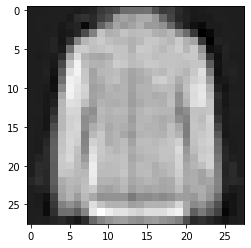

29 components


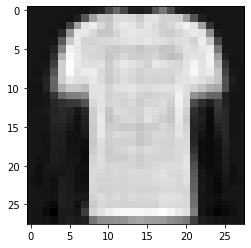

30 components


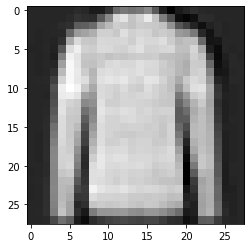

31 components


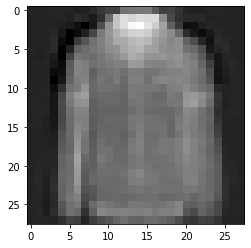

32 components


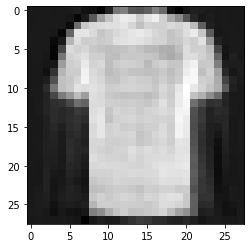

33 components


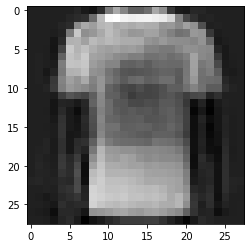

34 components


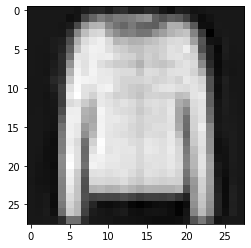

35 components


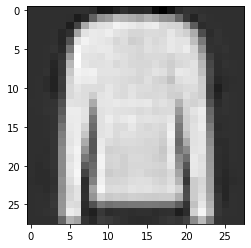

36 components


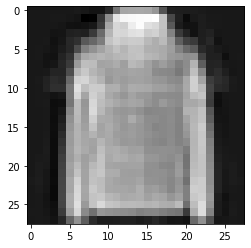

37 components


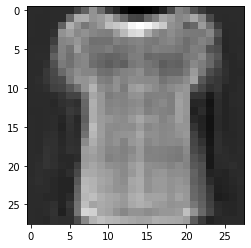

38 components


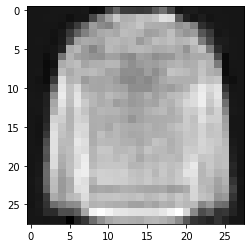

39 components


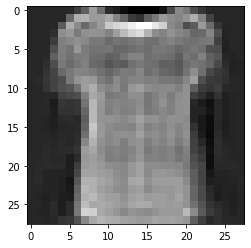

40 components


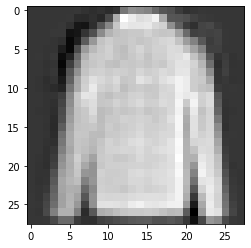

41 components


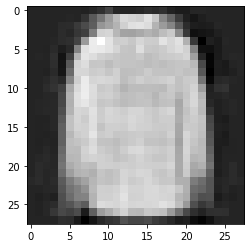

42 components


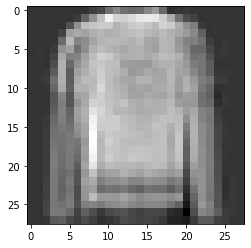

43 components


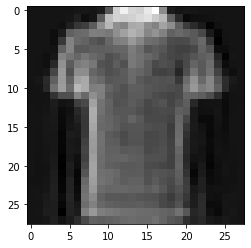

44 components


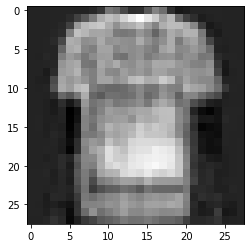

45 components


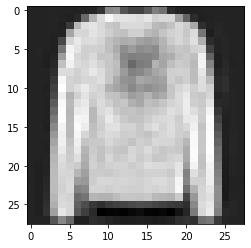

46 components


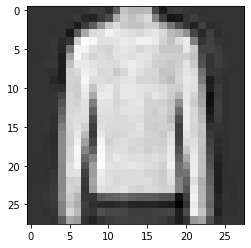

47 components


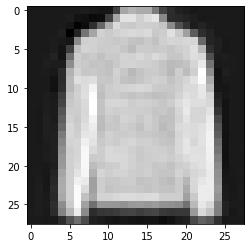

48 components


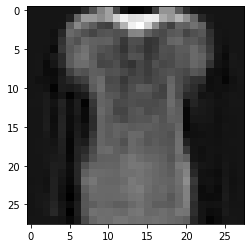

49 components


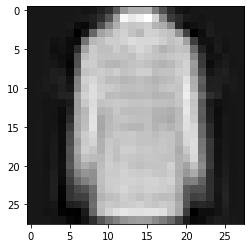

50 components


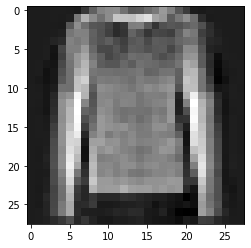

51 components


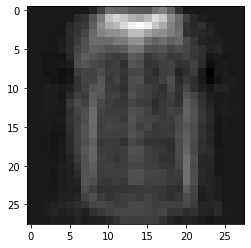

52 components


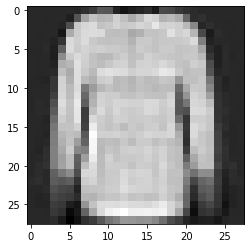

53 components


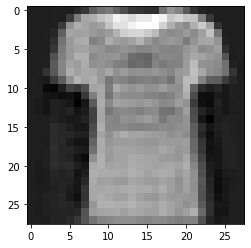

54 components


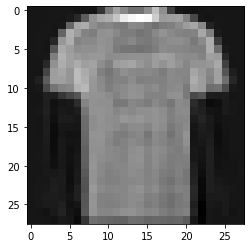

55 components


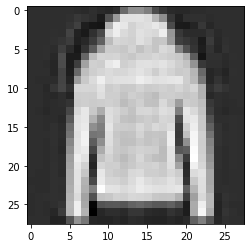

56 components


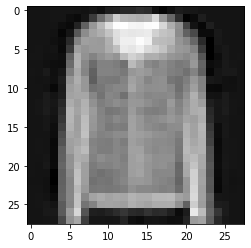

57 components


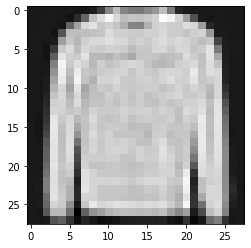

58 components


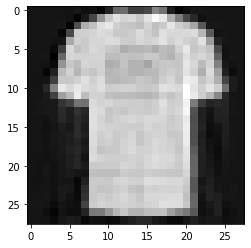

59 components


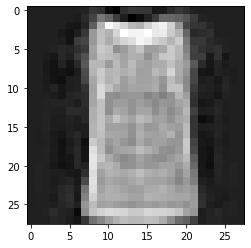

60 components


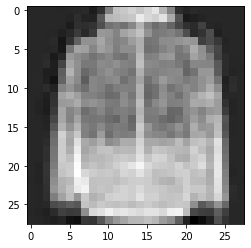

61 components


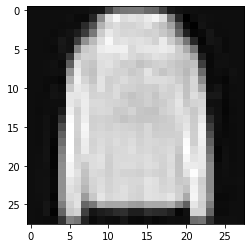

62 components


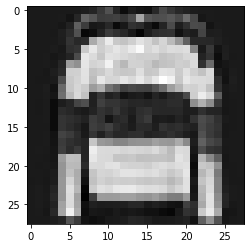

63 components


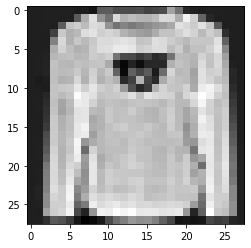

64 components


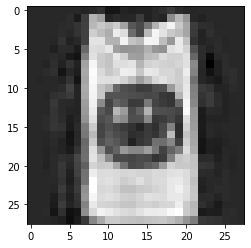

65 components


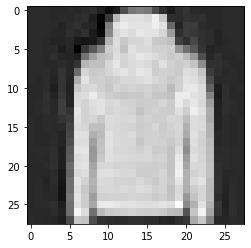

66 components


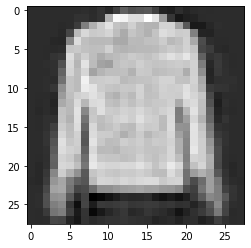

67 components


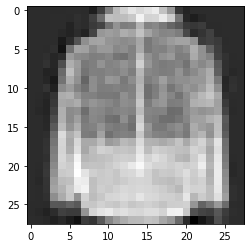

68 components


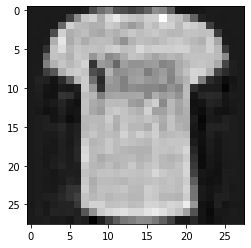

69 components


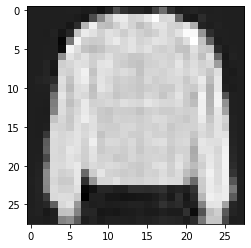

70 components


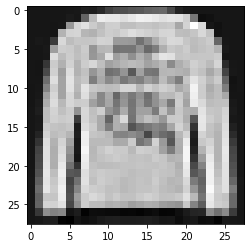

71 components


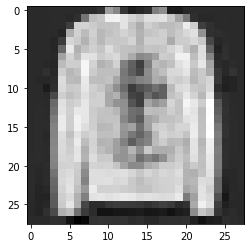

72 components


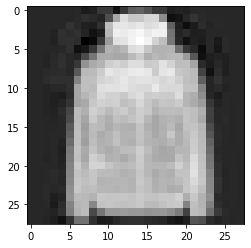

73 components


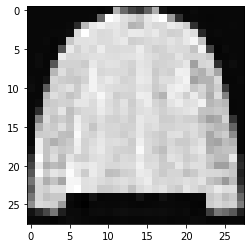

74 components


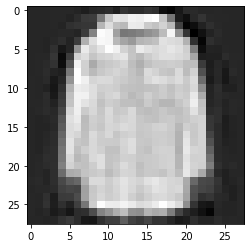

75 components


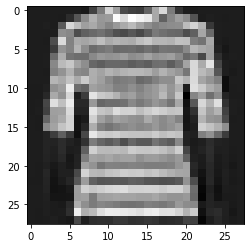

76 components


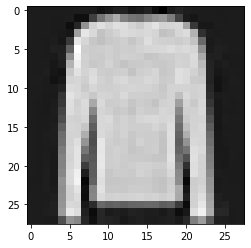

77 components


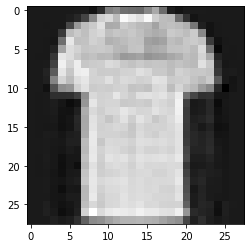

78 components


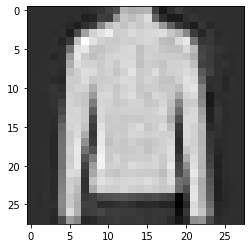

79 components


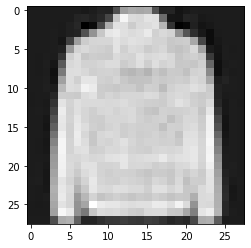

80 components


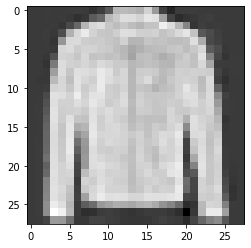

81 components


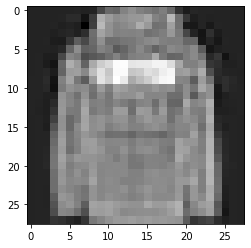

82 components


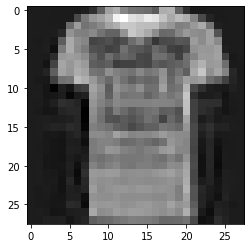

83 components


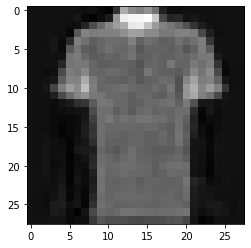

84 components


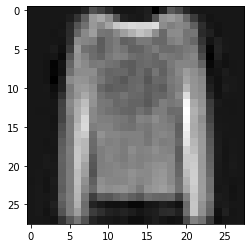

85 components


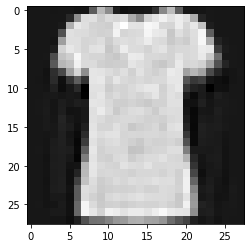

86 components


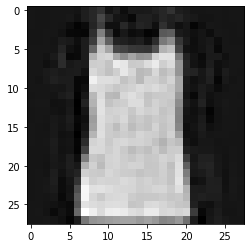

87 components


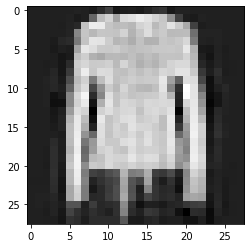

88 components


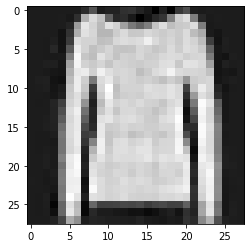

89 components


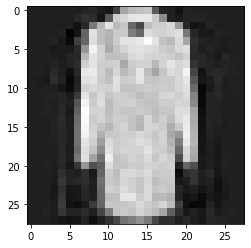

90 components


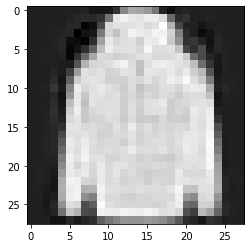

91 components


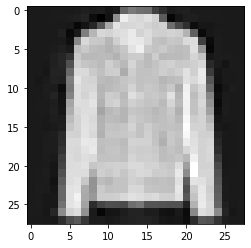

92 components


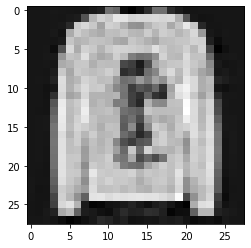

93 components


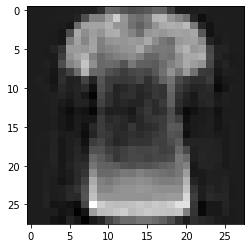

94 components


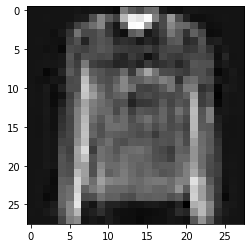

95 components


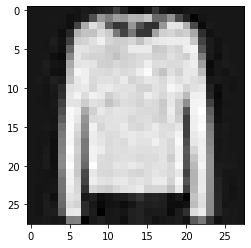

96 components


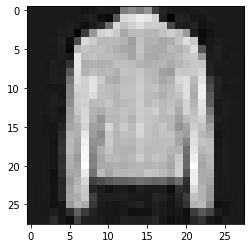

97 components


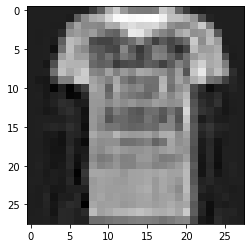

98 components


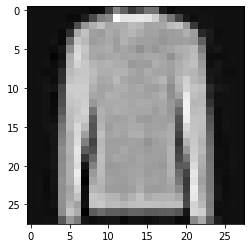

99 components


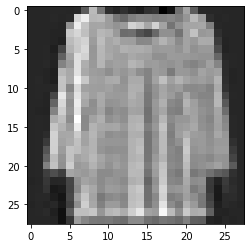

100 components


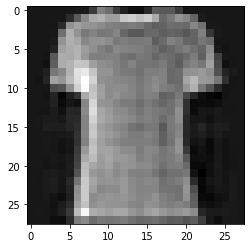

101 components


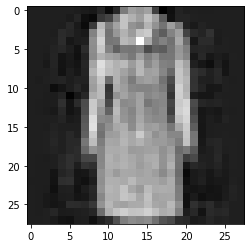

102 components


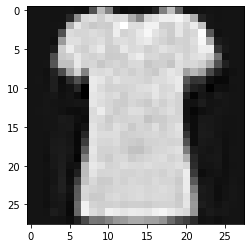

103 components


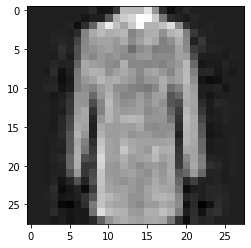

104 components


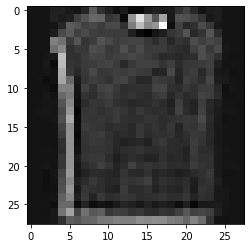

105 components


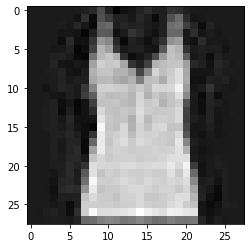

106 components


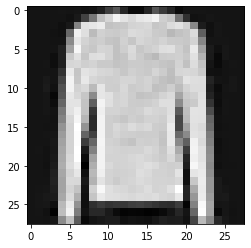

107 components


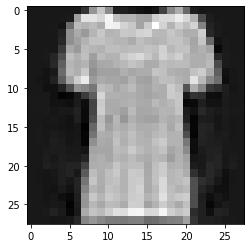

108 components


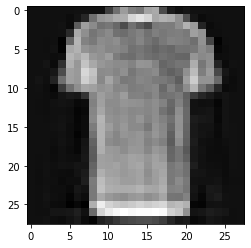

109 components


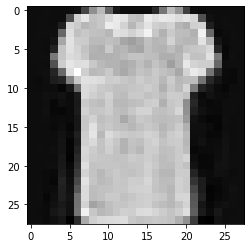

110 components


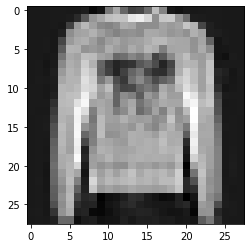

111 components


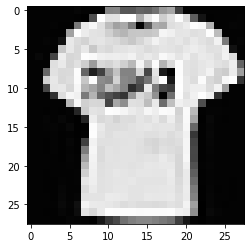

112 components


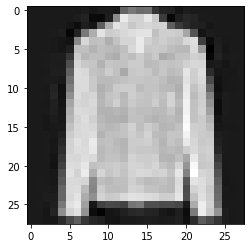

113 components


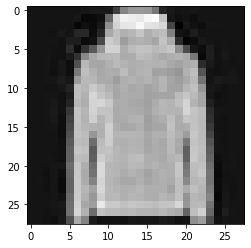

114 components


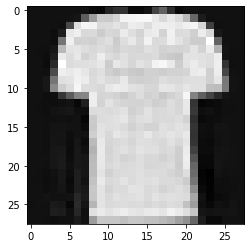

115 components


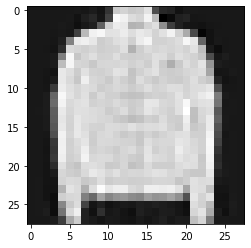

116 components


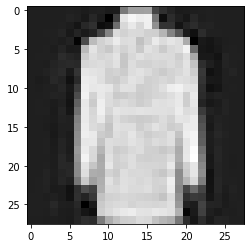

117 components


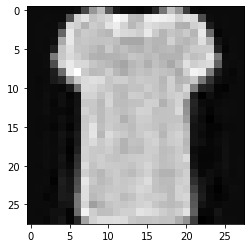

118 components


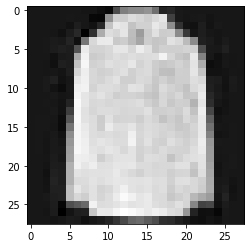

119 components


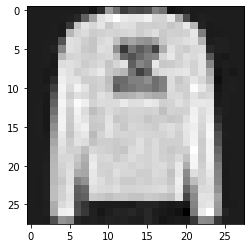

120 components


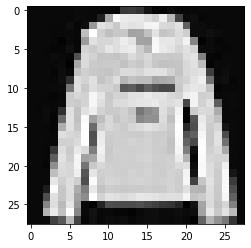

121 components


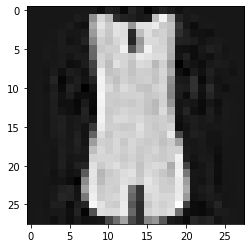

122 components


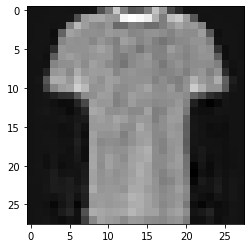

123 components


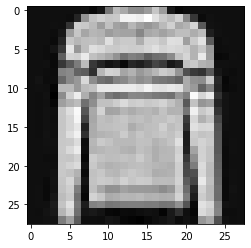

124 components


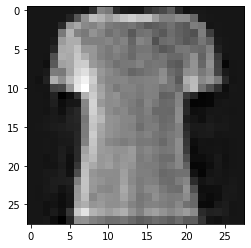

125 components


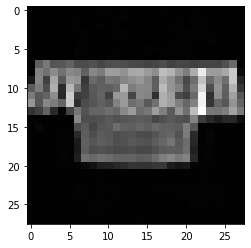

126 components


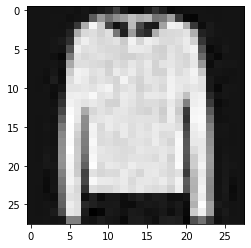

127 components


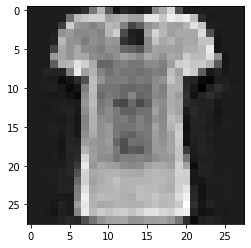

128 components


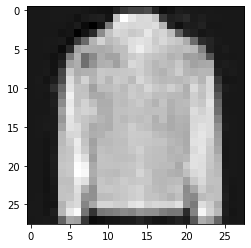

129 components


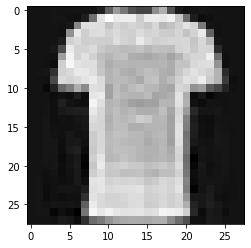

130 components


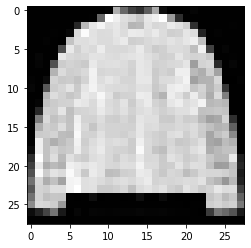

131 components


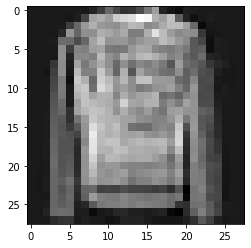

132 components


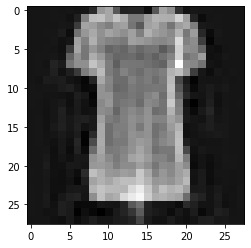

133 components


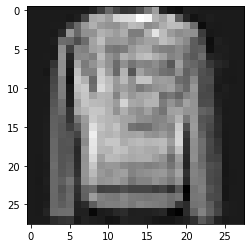

134 components


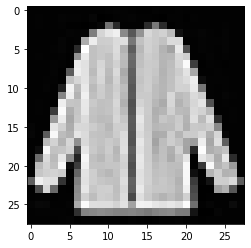

135 components


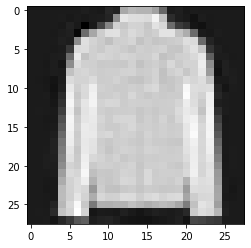

136 components


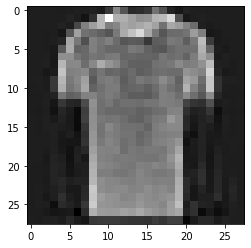

137 components


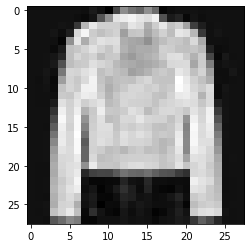

138 components


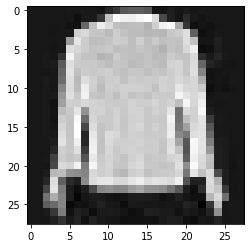

139 components


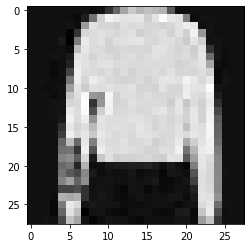

140 components


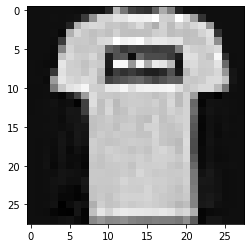

141 components


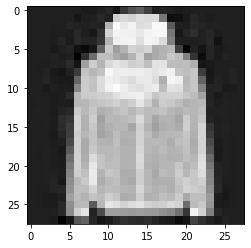

142 components


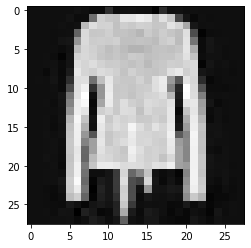

143 components


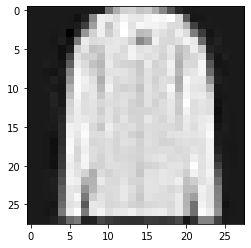

144 components


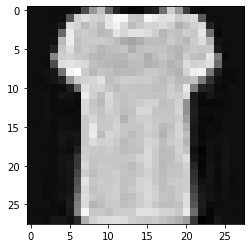

145 components


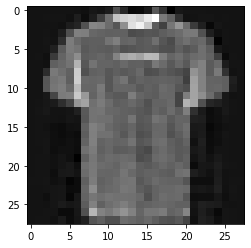

146 components


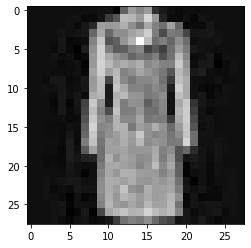

147 components


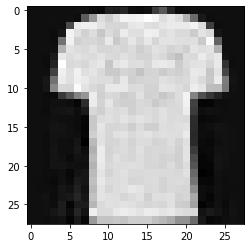

148 components


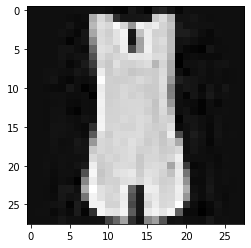

149 components


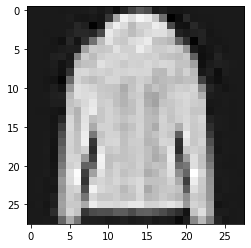

150 components


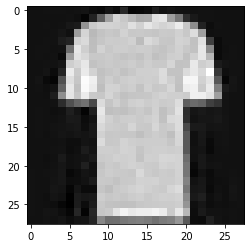

151 components


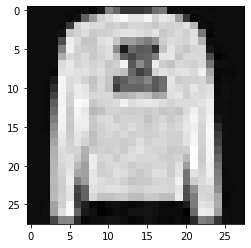

152 components


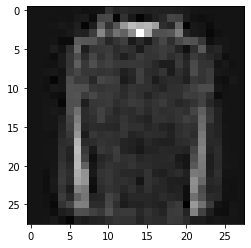

153 components


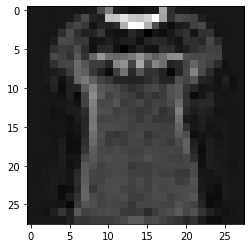

154 components


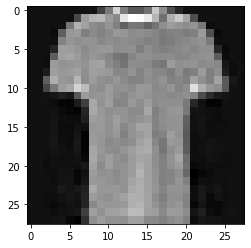

155 components


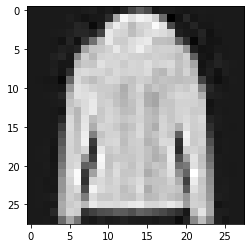

156 components


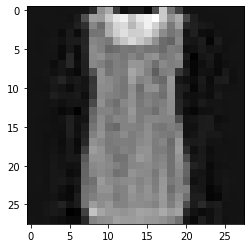

157 components


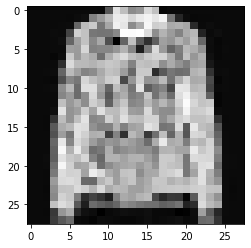

158 components


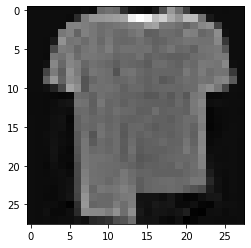

159 components


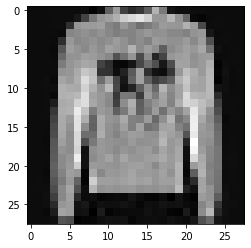

160 components


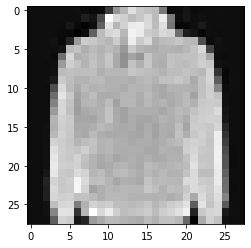

161 components


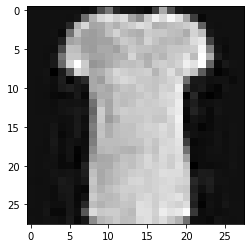

162 components


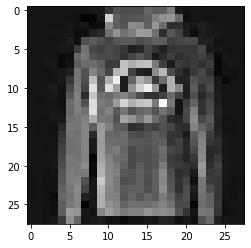

163 components


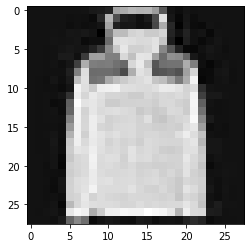

164 components


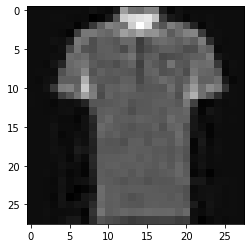

165 components


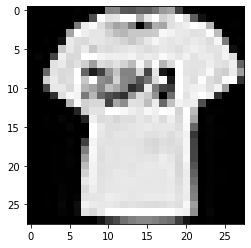

166 components


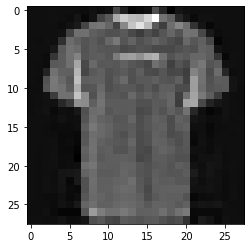

167 components


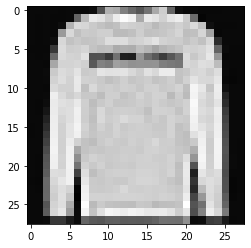

168 components


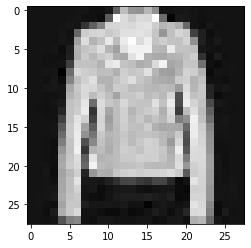

169 components


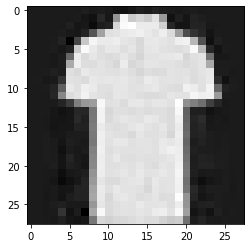

170 components


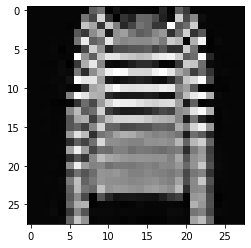

171 components


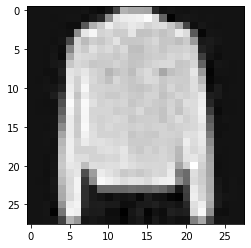

172 components


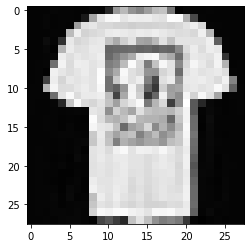

173 components


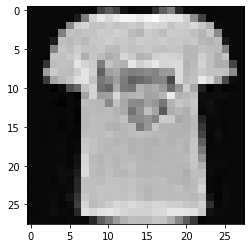

174 components


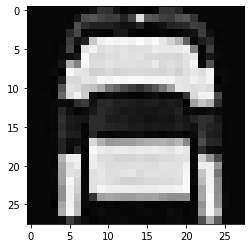

175 components


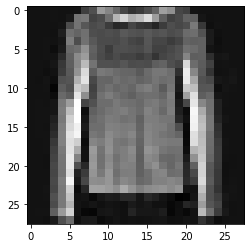

176 components


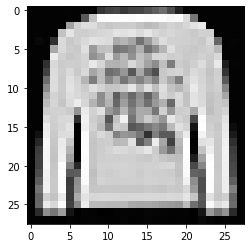

177 components


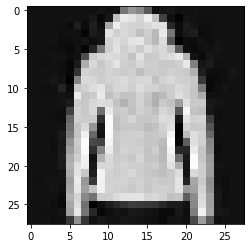

178 components


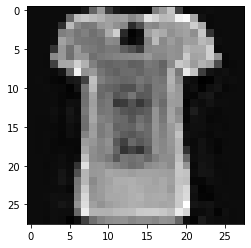

179 components


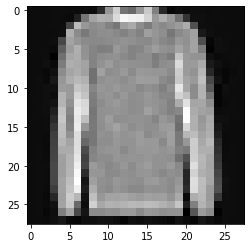

180 components


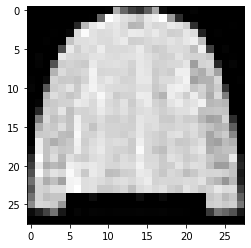

181 components


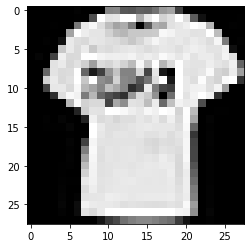

182 components


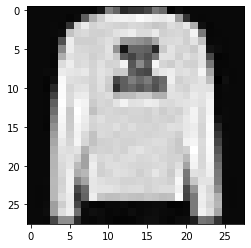

183 components


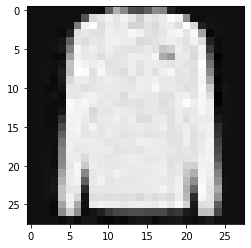

184 components


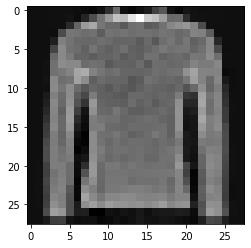

185 components


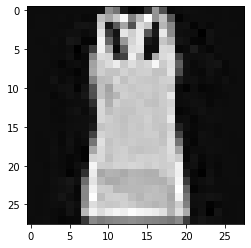

186 components


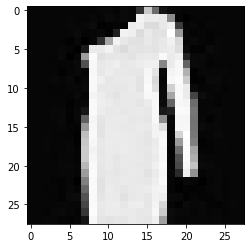

187 components


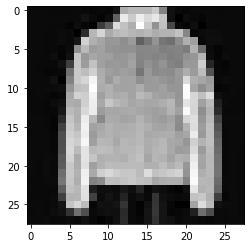

188 components


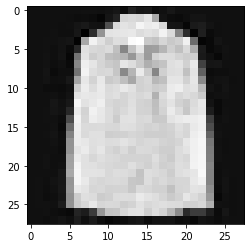

189 components


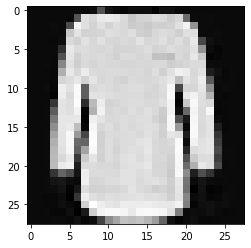

190 components


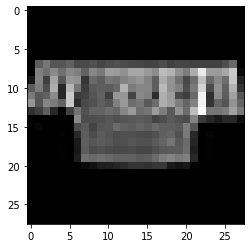

191 components


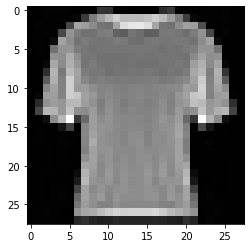

192 components


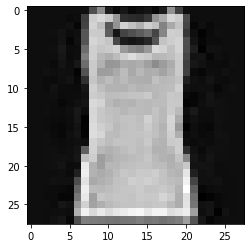

193 components


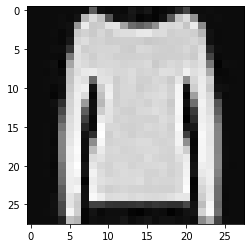

194 components


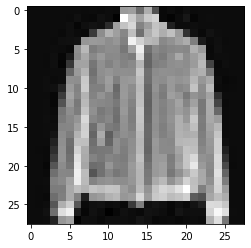

195 components


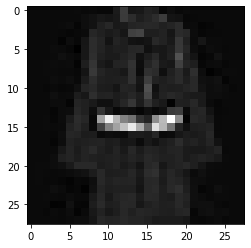

196 components


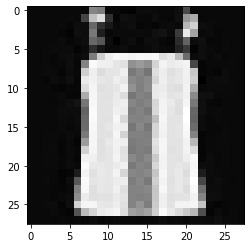

197 components


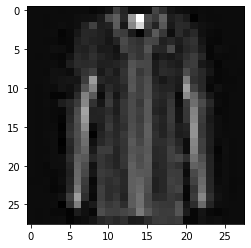

198 components


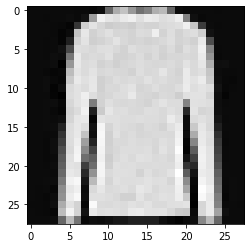

199 components


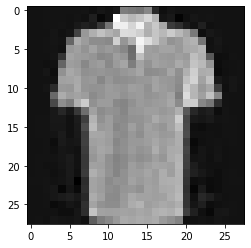

200 components


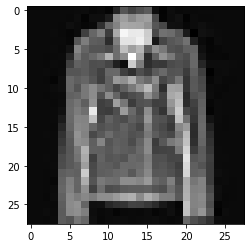

201 components


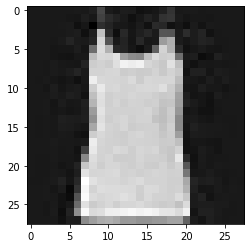

202 components


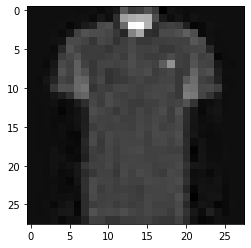

203 components


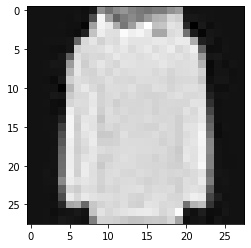

204 components


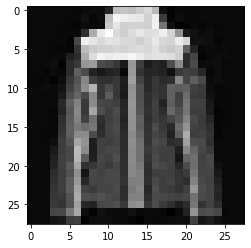

205 components


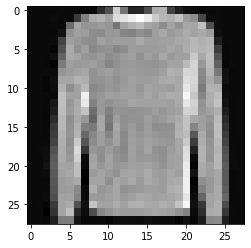

206 components


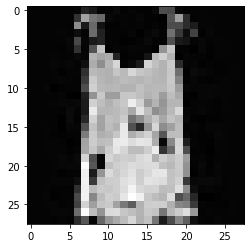

207 components


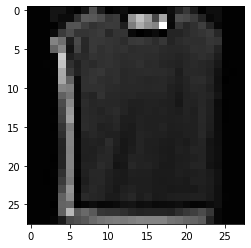

208 components


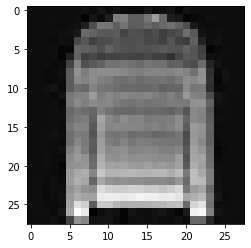

209 components


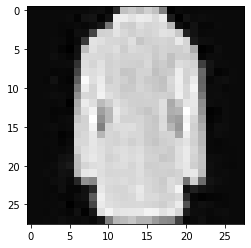

210 components


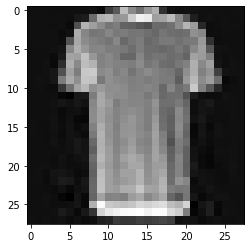

211 components


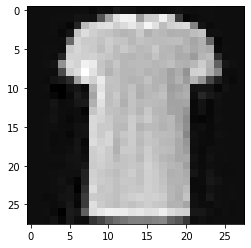

212 components


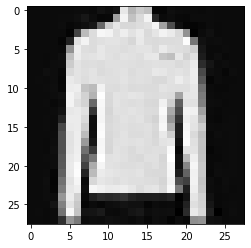

213 components


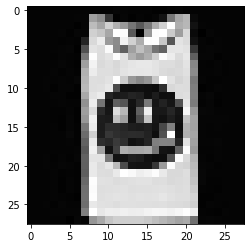

214 components


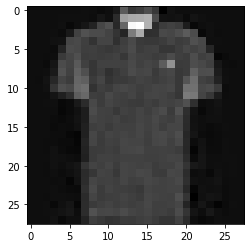

215 components


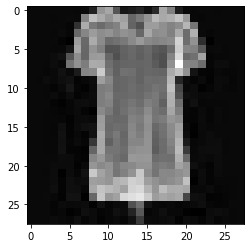

216 components


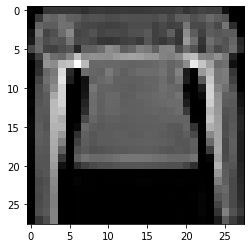

217 components


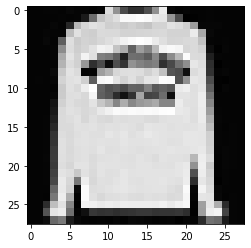

218 components


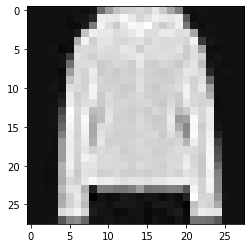

219 components


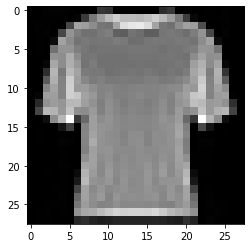

220 components


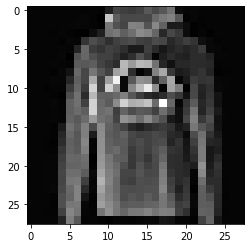

221 components


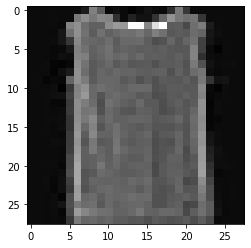

222 components


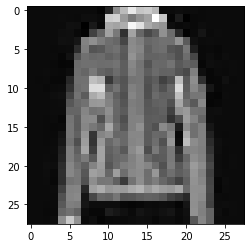

223 components


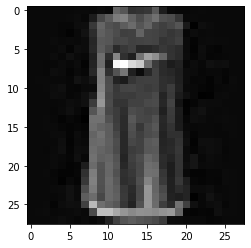

224 components


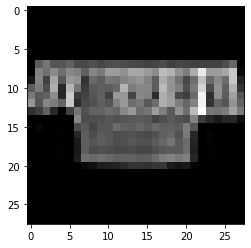

225 components


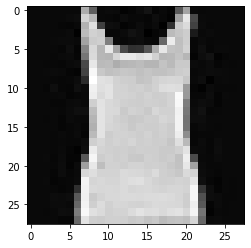

226 components


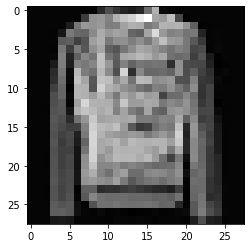

227 components


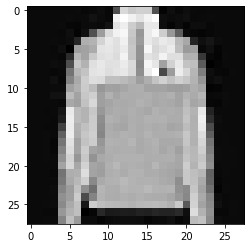

228 components


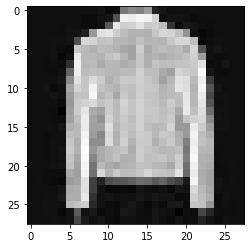

229 components


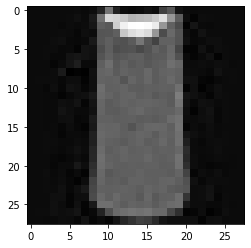

230 components


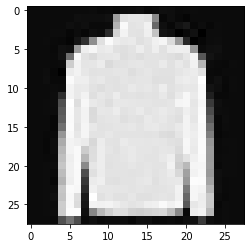

231 components


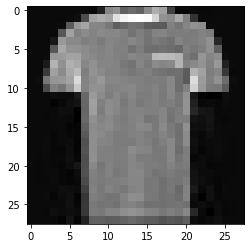

232 components


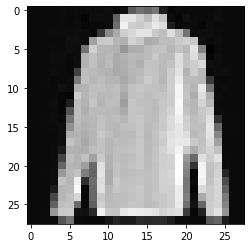

233 components


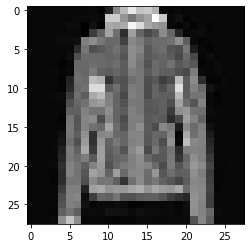

234 components


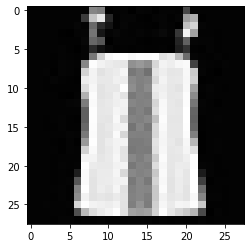

235 components


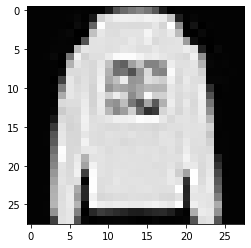

236 components


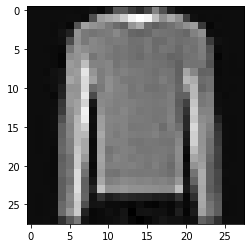

237 components


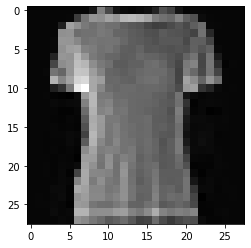

238 components


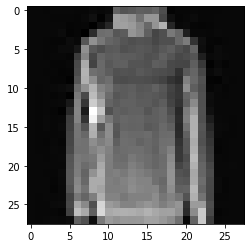

239 components


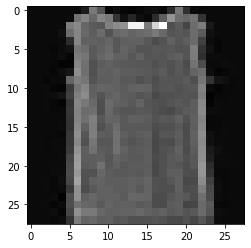

240 components


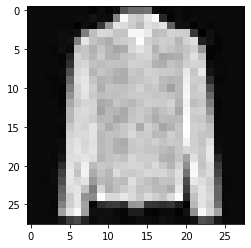

241 components


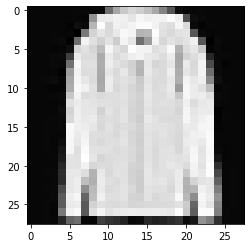

242 components


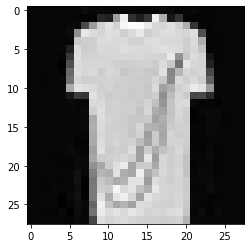

243 components


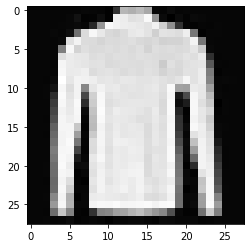

244 components


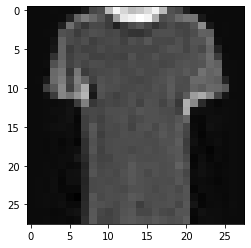

245 components


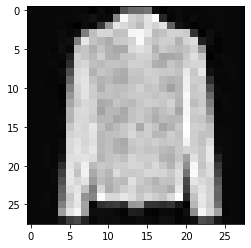

246 components


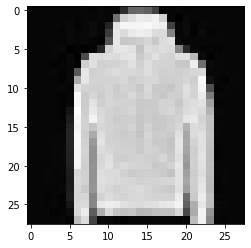

247 components


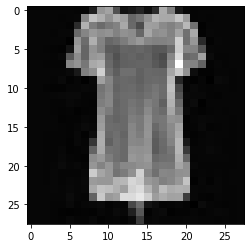

248 components


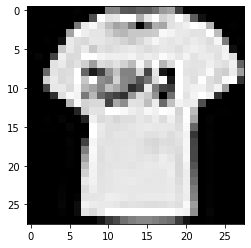

249 components


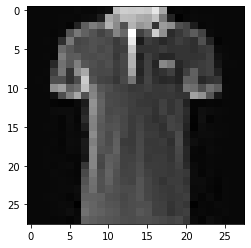

In [42]:
for x in range(1,250):
    print(x,'components')
    n_pc (x)
    

 through my test, at least 37 components can let humans identify the items.

##### Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions. Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images?

In [43]:
# I choose 3 class, and there are 288 y belonging to these classes
#I choose 10 component sise is 288*10 , projection size is (784*10)
compress_ratio = (288*784)/(288*10*10+784*10)
compress_ratio

6.162445414847162

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

